# Telecom Churn Case Study

- <font color='green'> Rubi Bakshi </font>
- <font color='green'> Prateek Jampani </font>

**Note:** *Some of the models can take long time to run, on a CPU machine (Intel i7, 16GB RAM, win-10, 64bits), such as :*
- kNN Imputer takes nearly 1hr (k=5)
- Random Forest grid search can take 1.25 hrs
- Gradient Boost grid search can take more than 6.5 hrs

---
BEGIN

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')


# Displaying all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
# Reading the data file.
tel_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Displaying the first 10 rows
tel_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [4]:
# Checking the shape
tel_data.shape

(99999, 226)

In [5]:
# Checking the informations regarding the dataset
tel_data.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

#### Let us check the month specific columns 

In [6]:
month_6_cols = tel_data.filter(regex='_6$',axis=1).columns
tel_data.loc[:, month_6_cols].head()

,last_date_of_month_6,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,6/30/2014,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,6/21/2014,252,6/21/2014,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
1,6/30/2014,34.047,24.11,15.74,0.0,0.0,23.88,11.51,0.00,0.0,35.39,0.23,0.00,0.00,0.0,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,0.0,5.90,26.83,0.00,1.83,0.00,4,74,44,6/29/2014,44,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,6/30/2014,167.690,11.54,143.33,0.0,0.0,7.19,29.34,24.11,0.0,60.66,4.34,41.81,1.48,0.0,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,0.0,139.33,370.04,0.21,0.00,0.93,5,168,86,6/17/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,6/30/2014,221.338,99.91,123.31,0.0,0.0,73.68,107.43,1.91,0.0,183.03,26.23,2.99,0.00,0.0,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,0.0,45.99,280.08,0.59,0.00,0.00,10,230,60,6/28/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,6/30/2014,261.636,50.31,76.96,0.0,0.0,50.31,67.64,0.00,0.0,117.96,0.00,9.31,0.00,0.0,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,0.0,1.93,216.44,0.00,0.00,0.48,5,196,56,6/26/2014,50,6/4/2014,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0


In [7]:
month_7_cols = tel_data.filter(regex='_7$',axis=1).columns
tel_data.loc[:, month_7_cols].head()

,last_date_of_month_7,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_t2c_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rch_amt_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,fb_user_7
0,7/31/2014,214.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,3,252,252,7/16/2014,252,7/16/2014,1.0,252.0,0.0,1.0,252.0,1.32,150.76,212.17,212.17,0.0,0,0,1,0,1.0
1,7/31/2014,355.074,78.68,99.84,0.00,0.00,74.56,75.94,0.00,2.91,150.51,4.11,0.46,0.00,0.0,4.58,0.0,23.43,0.0,178.53,29.91,65.38,8.93,104.23,0.00,0.00,0.00,0.0,0.00,104.23,0.0,0.00,0.00,9,384,154,7/31/2014,23,7/25/2014,1.0,154.0,1.0,0.0,154.0,108.07,0.00,0.00,28.61,0.0,1,0,0,0,1.0
2,7/31/2014,189.058,55.24,220.59,0.00,0.00,28.74,16.86,21.79,135.54,67.41,26.49,67.41,14.76,0.0,108.68,0.0,236.84,0.0,412.94,71.11,15.44,122.29,208.86,71.29,177.01,58.34,0.0,306.66,519.53,0.0,0.85,3.14,4,315,200,7/24/2014,200,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,7/31/2014,251.102,54.39,109.01,54.86,28.09,34.81,83.21,0.65,0.00,118.68,14.89,1.73,0.00,0.0,16.63,0.0,0.00,0.0,135.31,19.98,64.51,27.09,111.59,66.44,38.56,0.00,0.0,105.01,216.61,0.0,0.00,0.00,11,310,50,7/31/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,7/31/2014,309.876,149.44,91.88,0.00,0.00,149.44,91.88,0.00,0.00,241.33,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,241.33,88.49,109.54,0.00,198.04,0.00,0.25,0.00,0.0,0.25,198.29,0.0,0.00,0.00,6,350,110,7/28/2014,110,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN


In [8]:
month_8_cols = tel_data.filter(regex='_8$',axis=1).columns
tel_data.loc[:, month_8_cols].head()

,last_date_of_month_8,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8
0,8/31/2014,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.0,0.00,5.44,0.0,0.0,0.0,2,252,252,8/8/2014,252,8/8/2014,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0
1,8/31/2014,268.321,7.68,304.76,0.00,0.00,7.68,291.86,0.00,0.00,299.54,0.00,0.13,0.00,0.0,0.13,0.0,12.76,0.0,312.44,29.23,375.58,3.61,408.43,2.35,12.49,0.00,0.0,14.84,423.28,0.0,0.0,0.0,11,283,65,8/28/2014,30,8/10/2014,2.0,25.0,2.0,0.0,50.0,365.47,0.00,0.00,7.60,0.0,0,2,0,0,1.0
2,8/31/2014,210.226,37.26,208.36,0.00,0.00,13.58,38.46,15.61,45.76,67.66,22.58,75.53,22.83,0.0,120.94,0.0,96.84,0.0,285.46,67.46,38.89,49.63,155.99,28.69,167.09,43.23,0.0,239.03,395.03,0.0,0.0,0.0,2,116,86,8/14/2014,86,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,8/31/2014,508.054,310.98,71.68,44.38,39.04,10.61,22.46,4.91,0.00,37.99,289.58,6.53,0.00,0.0,296.11,0.0,18.09,0.0,352.21,8.04,20.28,19.84,48.18,0.00,4.94,0.00,0.0,4.94,53.13,0.0,0.0,0.0,18,601,50,8/31/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,8/31/2014,238.174,83.89,124.26,0.00,0.00,83.89,124.26,0.00,0.00,208.16,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,208.16,233.81,104.13,0.00,337.94,0.86,0.00,0.00,0.0,0.86,338.81,0.0,0.0,0.0,3,287,110,8/9/2014,110,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN


In [9]:
month_9_cols = tel_data.filter(regex='_9$',axis=1).columns
tel_data.loc[:, month_9_cols].head()

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9
0,9/30/2014,21.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,6,0,0,9/28/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,0,0,0,0,NaN
1,9/30/2014,86.285,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,72.11,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,72.11,116.09,56.93,0.00,173.03,0.00,15.01,0.00,0.0,15.01,188.04,0.00,0.00,0.00,5,121,50,9/30/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,9/30/2014,290.714,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,64.81,8.76,9.28,0.0,0.0,18.04,0.0,42.08,0.0,124.94,148.23,38.98,158.19,345.41,49.44,118.18,3.86,0.0,171.49,517.74,0.45,0.01,0.36,7,358,100,9/29/2014,0,9/17/2014,1.0,46.0,1.0,0.0,46.0,0.0,8.42,2.84,0.0,0.0,0,1,0,0,1.0
3,9/30/2014,389.500,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,83.03,226.21,9.99,0.0,0.0,236.21,0.0,43.29,0.0,362.54,41.73,52.86,65.59,160.19,129.84,13.98,0.00,0.0,143.83,305.38,0.55,0.00,0.80,14,410,50,9/30/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,9/30/2014,163.426,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,98.61,0.00,0.00,0.0,0.0,0.00,0.0,5.98,0.0,104.59,154.56,48.24,0.00,202.81,2.31,0.00,0.00,0.0,2.31,205.31,0.18,0.00,0.00,4,200,50,9/28/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,0,0,0,0,NaN


In [10]:
len(month_6_cols)

54

In [11]:
# Set of attributes for each month

month_6_cols

Index(['last_date_of_month_6', 'arpu_6', 'onnet_mou_6', 'offnet_mou_6',
       'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6',
       'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6',
       'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user

#### We can observe that many date columns are given as object type, so converting them to datetime

In [12]:
# Selecting all the columns with datetime format
date_col= tel_data.select_dtypes(include=['object'])
# print("\nColumns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
tel_data[date_col.columns] = tel_data[date_col.columns].apply(lambda x: pd.to_datetime(x))


In [13]:
# Checking column types again
tel_data.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype         
---   ------                    --------------  -----         
 0    mobile_number             99999 non-null  int64         
 1    circle_id                 99999 non-null  int64         
 2    loc_og_t2o_mou            98981 non-null  float64       
 3    std_og_t2o_mou            98981 non-null  float64       
 4    loc_ic_t2o_mou            98981 non-null  float64       
 5    last_date_of_month_6      99999 non-null  datetime64[ns]
 6    last_date_of_month_7      99398 non-null  datetime64[ns]
 7    last_date_of_month_8      98899 non-null  datetime64[ns]
 8    last_date_of_month_9      98340 non-null  datetime64[ns]
 9    arpu_6                    99999 non-null  float64       
 10   arpu_7                    99999 non-null  float64       
 11   arpu_8                    99999 non-null  float64       
 12   ar

In [14]:
# Statistical analysis of the numercial columns
tel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


**Observations**:
   - There are few columns that have min, max, median all same values, those should be discarded
   - Some columns such as fb_user_X, night_pack_user_X have min value = 0 and max value = 1, and till 75%lie is 0, means these are categorical values with high skewness towards 0, need to check them separately.

In [15]:
# Lets check the columns with min=max and drop such columns as they are of no value
col_to_drop=[]
for i in tel_data.columns:
    if min(tel_data[i]) == max(tel_data[i]):
        col_to_drop.append(i)
    else:
        pass
print(col_to_drop)
#tel_data.drop(col, axis=1, inplace = True)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_8']


Let's check the categorical columns

1.0    0.914404
0.0    0.085596
Name: fb_user_6, dtype: float64


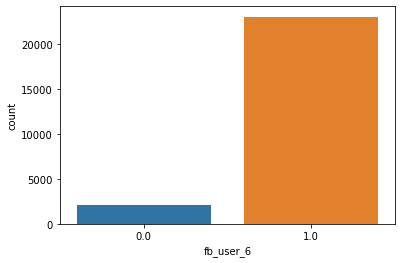

1.0    0.908764
0.0    0.091236
Name: fb_user_7, dtype: float64


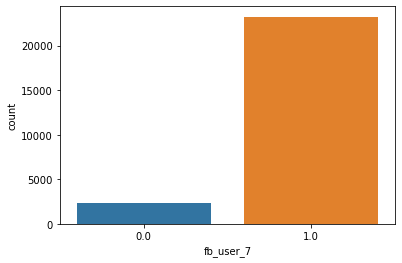

1.0    0.890808
0.0    0.109192
Name: fb_user_8, dtype: float64


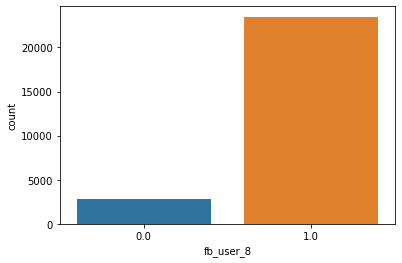

1.0    0.860968
0.0    0.139032
Name: fb_user_9, dtype: float64


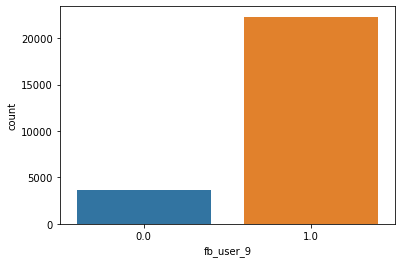

In [16]:
fb_user_col = tel_data.filter(regex='^fb_user_',axis=1).columns

for i in fb_user_col:
    print(tel_data[i].value_counts(normalize=True))
    plt.figure()
    sns.countplot(x=i, data=tel_data)
    plt.show()
    #print(100*tel_data[i].value_counts()[1]/(tel_data[i].value_counts()[0]+tel_data[i].value_counts()[1]))

**Observation:** Seems these are about 75% missing values in the fb_user_X columns. Whithin that also, around 90% are 1s and abou 10% are 0s, hence these columns are good enough to be discarded. 

In [17]:
for i in fb_user_col:
    col_to_drop.append(i)

0.0    0.974914
1.0    0.025086
Name: night_pck_user_6, dtype: float64


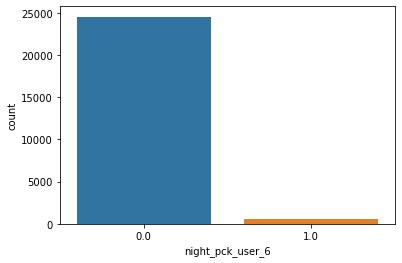

0.0    0.976966
1.0    0.023034
Name: night_pck_user_7, dtype: float64


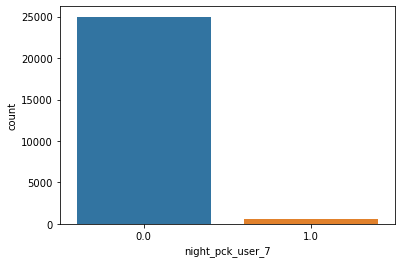

0.0    0.979156
1.0    0.020844
Name: night_pck_user_8, dtype: float64


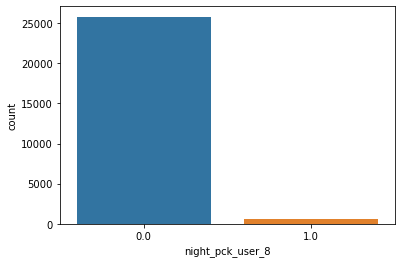

0.0    0.984029
1.0    0.015971
Name: night_pck_user_9, dtype: float64


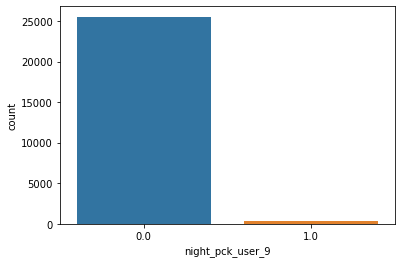

In [18]:
night_pack_user_col = tel_data.filter(regex='^night_pck_user_',axis=1).columns

for i in night_pack_user_col:
    print(tel_data[i].value_counts(normalize=True))
    plt.figure()
    sns.countplot(x=i, data=tel_data)
    plt.show()

**Observation:** Worst scenario than fb_user_X columns, these are also should be discarded. 

In [19]:
for i in night_pack_user_col:
    col_to_drop.append(i)

In [20]:
tel_data2 = tel_data.drop(col_to_drop, axis=1)
tel_data2.shape

(99999, 208)

#### Let's check the overall missing values in the dataset

In [21]:
# Checkng the overall missing values in the dataset
((tel_data2.isnull().sum()/tel_data2.shape[0])*100).round(2).sort_values(ascending=False)

arpu_3g_6                   74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
av_rech_amt_data_6          74.85
total_rech_data_6           74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
arpu_2g_7                   74.43
max_rech_data_7             74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
total_rech_data_9           74.08
date_of_last_rech_data_9    74.08
arpu_3g_9                   74.08
max_rech_data_9             74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
count_rech_2g_9             74.08
count_rech_3g_9             74.08
count_rech_2g_8             73.66
max_rech_data_8             73.66
date_of_last_rech_data_8    73.66
av_rech_amt_data_8          73.66
count_rech_3g_8             73.66
arpu_2g_8     

#### Handling missing values

In [22]:
# Handling missing values with respect to `data recharge` attributes

rech_data_col = [col for col in tel_data.columns if 'rech_data' in col]
tel_data.loc[:, rech_data_col].head(10)

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,NaT,2014-07-25,2014-08-10,NaT,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN
2,NaT,NaT,NaT,2014-09-17,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0
3,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-06-04,NaT,NaT,NaT,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
5,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,2014-07-31,2014-08-23,NaT,NaN,2.0,3.0,NaN,NaN,154.0,23.0,NaN
9,NaT,2014-07-23,NaT,NaT,NaN,1.0,NaN,NaN,NaN,154.0,NaN,NaN


**Observation:** Let us consider the column date_of_last_rech_data_X indicating the date of the last recharge made in any given month for mobile internet. If the date value is NaN and the recharge data values, i.e. total_rech_data and the max_rech_data are also NaN values, then the missing values actually mean that there has been no recharge done for those months. Hence, we can impute 0 as their values.

In [23]:
df_rech_data_na_6 = tel_data2[(tel_data2["total_rech_data_6"].isna()) & (tel_data2["max_rech_data_6"].isna()) & (tel_data2['date_of_last_rech_data_6'].isna())]
df_rech_data_na_7 = tel_data2[(tel_data2["total_rech_data_7"].isna()) & (tel_data2["max_rech_data_7"].isna()) & (tel_data2['date_of_last_rech_data_7'].isna())]
df_rech_data_na_8 = tel_data2[(tel_data2["total_rech_data_8"].isna()) & (tel_data2["max_rech_data_8"].isna()) & (tel_data2['date_of_last_rech_data_8'].isna())]
df_rech_data_na_9 = tel_data2[(tel_data2["total_rech_data_9"].isna()) & (tel_data2["max_rech_data_9"].isna()) & (tel_data2['date_of_last_rech_data_9'].isna())]
#df_rech_data_na_6.shape
#[['total_rech_data_6', 'max_rech_data_6']] = df_rech_data_6.shape
#

In [24]:
tel_data2.loc[df_rech_data_na_6.index, 'total_rech_data_6']=0
tel_data2.loc[df_rech_data_na_7.index, 'total_rech_data_7']=0
tel_data2.loc[df_rech_data_na_8.index, 'total_rech_data_8']=0
tel_data2.loc[df_rech_data_na_9.index, 'total_rech_data_9']=0

In [25]:
tel_data2[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']].isna().sum()

total_rech_data_6    0
total_rech_data_7    0
total_rech_data_8    0
total_rech_data_9    0
dtype: int64

In [26]:
tel_data2.loc[df_rech_data_na_6.index, 'max_rech_data_6']=0
tel_data2.loc[df_rech_data_na_7.index, 'max_rech_data_7']=0
tel_data2.loc[df_rech_data_na_8.index, 'max_rech_data_8']=0
tel_data2.loc[df_rech_data_na_9.index, 'max_rech_data_9']=0

In [27]:
tel_data2[['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']].isna().sum()

max_rech_data_6    0
max_rech_data_7    0
max_rech_data_8    0
max_rech_data_9    0
dtype: int64

In [28]:
rech_data_col = [col for col in tel_data2.columns if 'rech_data' in col]
tel_data2.loc[:, rech_data_col].head(10)

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0
1,NaT,2014-07-25,2014-08-10,NaT,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0
2,NaT,NaT,NaT,2014-09-17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0
3,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-06-04,NaT,NaT,NaT,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
5,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NaT,2014-07-31,2014-08-23,NaT,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0
9,NaT,2014-07-23,NaT,NaT,0.0,1.0,0.0,0.0,0.0,154.0,0.0,0.0


In [29]:
# checking the missign value counts after this imputation
((tel_data2.isnull().sum()/tel_data2.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_6          74.85
count_rech_2g_6             74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
date_of_last_rech_data_6    74.85
arpu_3g_6                   74.85
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
count_rech_2g_7             74.43
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
arpu_3g_9                   74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
arpu_3g_8                   73.66
av_rech_amt_data_8          73.66
date_of_last_rech_data_8    73.66
arpu_2g_8                   73.66
count_rech_3g_8             73.66
count_rech_2g_8             73.66
spl_ic_mou_9                7.75 
ic_others_9                 7.75 
std_og_t2m_mou_9            7.75 
loc_ic_mou_9                7.75 
isd_ic_mou_9                7.75 
std_og_t2f_mou

In [30]:
# Checking the related columns values for a month
tel_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,0.0,1.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


The count of recharge can be dropped as it is already explained by total recharge values

In [31]:
col_to_drop=[]
[col_to_drop.append(col) for col in tel_data2.columns if 'count_rech' in col]

[None, None, None, None, None, None, None, None]

In [32]:
col_to_drop

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9']

In [33]:
# Checking the revenue generating column values
tel_data2[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [34]:
revenue_col = [col for col in tel_data2.columns if (('arpu' in col) or ('av_rech_amt' in col)) ]

<AxesSubplot:>

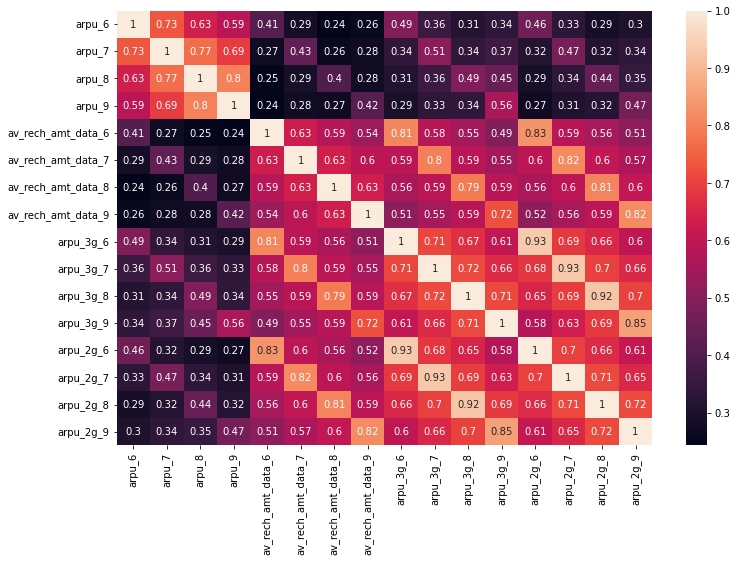

In [35]:
plt.figure(figsize=(12,8))
corr = tel_data2[revenue_col].corr()
sns.heatmap(corr, annot=True)

**Observations:**
- From the above correlation table attributes arpu_2g_X and arpu_3g_X are highly correlated and they are also correlated to the attribute av_rech_amt_data_X for each month from 6 to 9 respectively.
- We decide to remove the columns which have >80% correlation

In [36]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
#print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(np.abs(upper_tri[column]) > 0.80)]
print(to_drop)

['arpu_9', 'arpu_3g_6', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']


In [37]:
cols = ['arpu_3g_6', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']
for c in cols:
    col_to_drop.append(c)
col_to_drop

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [38]:
tel_data2.drop(columns=col_to_drop, inplace=True)

In [39]:
month_7_cols

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7',
       'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'arpu_3g_7', 'arpu_2g_7',
       'night_pck_user

Let's check the data(internet) related columns

In [40]:
tel_data2[['date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7',
       'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 
           'arpu_3g_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7' ]].head(20)

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7
0,2014-07-16,1.0,252.0,252.0,1.32,150.76,212.17,0,0,1,0
1,2014-07-25,1.0,154.0,154.0,108.07,0.00,0.00,1,0,0,0
2,NaT,0.0,0.0,NaN,0.00,0.00,NaN,0,0,0,0
3,NaT,0.0,0.0,NaN,0.00,0.00,NaN,0,0,0,0
4,NaT,0.0,0.0,NaN,0.00,0.00,NaN,0,0,0,0
5,NaT,0.0,0.0,NaN,0.00,0.00,NaN,0,0,0,0
6,NaT,0.0,0.0,NaN,0.00,0.00,NaN,0,0,0,0
7,NaT,0.0,0.0,NaN,0.00,0.00,NaN,0,0,0,0
8,2014-07-31,2.0,154.0,177.0,356.00,750.95,0.00,1,1,0,0
9,2014-07-23,1.0,154.0,154.0,7.37,0.00,0.00,1,0,0,0


**Observation:**
   - total_rech_data_X and count_rech_X variables are counter variables. Whereas, max_rech_data_X, av_rech_amt_X and arpu_X variables are quantity defining variables. 
   - if total_rech_data_X is 0, means there has been no rechanrge done on that month by the user, then count_rech_X, avg_rech_amt_X, arpu_X variables that have NaN values can be imputed as 0. 

In [41]:
# for month 6
m6_idx = tel_data2[tel_data2['total_rech_data_6']==0].index
tel_data2.loc[m6_idx, ['count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6']] = 0

In [42]:
# for month 7
m7_idx = tel_data2[tel_data2['total_rech_data_7']==0].index
tel_data2.loc[m7_idx, ['count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7']] = 0

In [43]:
# for month 8
m8_idx = tel_data2[tel_data2['total_rech_data_8']==0].index
tel_data2.loc[m8_idx, ['count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8']] = 0

In [44]:
# for month 9
m9_idx = tel_data2[tel_data2['total_rech_data_9']==0].index
tel_data2.loc[m9_idx, ['count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9']] = 0

In [45]:
# Checkng the overall missing values in the dataset
((tel_data2.isnull().sum()/tel_data2.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
arpu_2g_8                   26.34
count_rech_3g_8             26.34
count_rech_2g_8             26.34
count_rech_2g_9             25.92
count_rech_3g_9             25.92
arpu_2g_9                   25.92
count_rech_3g_7             25.57
arpu_2g_7                   25.57
count_rech_2g_7             25.57
arpu_2g_6                   25.15
arpu_3g_6                   25.15
count_rech_3g_6             25.15
count_rech_2g_6             25.15
std_ic_t2m_mou_9            7.75 
isd_ic_mou_9                7.75 
loc_og_mou_9                7.75 
spl_og_mou_9                7.75 
loc_og_t2c_mou_9            7.75 
loc_ic_t2m_mou_9            7.75 
isd_og_mou_9                7.75 
std_og_t2t_mou_9            7.75 
spl_ic_mou_9                7.75 
ic_others_9                 7.75 
std_og_t2m_mou_9            7.75 
std_ic_mou_9                7.75 
std_og_mou_9  

Observations:
- From the above results, we can conclude, the date_of_last_rech_data_X have very high missing value, also they are of no use after imputing other data recharge related columns. So, we decide to drop these columns. 
- We shall try to impute through KNN-imputer for which there are less than 10% missing values. 

In [46]:
date_col = tel_data2.filter(regex='^date_',axis=1).columns
date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [47]:
tel_data2.drop(columns = ['date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'], inplace=True)

In [48]:
tel_data2[['arpu_2g_8', 'arpu_3g_8', 'count_rech_3g_8', 'count_rech_2g_8','total_rech_data_8', 
           'max_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8','monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8']]

,arpu_2g_8,arpu_3g_8,count_rech_3g_8,count_rech_2g_8,total_rech_data_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8
0,NaN,212.17,NaN,NaN,1.0,252.0,5.75,109.61,0,0,1,0
1,NaN,0.00,NaN,NaN,2.0,25.0,365.47,0.00,0,2,0,0
2,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0
3,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0
4,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0
99995,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0
99996,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0
99997,NaN,602.68,NaN,NaN,4.0,179.0,136.47,2683.30,0,0,4,0


Observation:
 - count_rech_3g_X = monthly_3g_X + sachet_3g_X
 - count_rech_2g_X = monthly_2g_X + sachet_2g_X
 - arpu_2g_X=0 if count_rech_2g_X=0
 - arpu_3g_X=0 if count_rech_3g_X=0

In [49]:
for i in range(6,10):
    a = 'count_rech_3g_'+str(i)
    b = 'monthly_3g_'+str(i)
    c = 'sachet_3g_'+str(i)
    d = 'count_rech_2g_'+str(i)
    e = 'monthly_2g_'+str(i)
    f = 'sachet_2g_'+str(i)
    g = 'arpu_3g_'+str(i)
    h = 'arpu_2g_'+str(i)
    
    tel_data2[a] = tel_data2[b] + tel_data2[c]
    tel_data2[d] = tel_data2[e] = tel_data2[f]
    tel_data2[g] = tel_data2[a].apply(lambda x: 0 if x==0 else x)
    tel_data2[h] = tel_data2[d].apply(lambda x: 0 if x==0 else x)

In [50]:
tel_data2[['arpu_2g_8', 'arpu_3g_8', 'count_rech_3g_8', 'count_rech_2g_8','total_rech_data_8', 
           'max_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8','monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8']]

,arpu_2g_8,arpu_3g_8,count_rech_3g_8,count_rech_2g_8,total_rech_data_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8
0,0,1,1,0,1.0,252.0,5.75,109.61,0,0,1,0
1,2,0,0,2,2.0,25.0,365.47,0.00,2,2,0,0
2,0,0,0,0,0.0,0.0,0.00,0.00,0,0,0,0
3,0,0,0,0,0.0,0.0,0.00,0.00,0,0,0,0
4,0,0,0,0,0.0,0.0,0.00,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0,0,0,0.0,0.0,0.00,0.00,0,0,0,0
99995,0,0,0,0,0.0,0.0,0.00,0.00,0,0,0,0
99996,0,0,0,0,0.0,0.0,0.00,0.00,0,0,0,0
99997,0,4,4,0,4.0,179.0,136.47,2683.30,0,0,4,0


In [51]:
# Checkng the missing values again
missing = ((tel_data2.isnull().sum()/tel_data2.shape[0])*100).round(2).sort_values(ascending=False)

missing_df = pd.DataFrame(missing, columns=['percentage'])
missing_df.head(10)

,percentage
spl_og_mou_9,7.75
loc_og_t2m_mou_9,7.75
loc_og_mou_9,7.75
std_og_t2f_mou_9,7.75
loc_og_t2t_mou_9,7.75
std_ic_t2o_mou_9,7.75
loc_ic_t2f_mou_9,7.75
std_og_t2m_mou_9,7.75
std_ic_t2f_mou_9,7.75
std_ic_mou_9,7.75


In [52]:
missing_cols=missing_df[missing_df.percentage>0].index

In [53]:
missing_cols

Index(['spl_og_mou_9', 'loc_og_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9',
       'loc_og_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_ic_t2f_mou_9',
       'std_og_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       ...
       'loc_ic_t2f_mou_7', 'isd_og_mou_7', 'loc_ic_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2t_mou_7', 'std_ic_t2t_mou_7', 'loc_og_mou_7',
       'date_of_last_rech_8', 'date_of_last_rech_7', 'date_of_last_rech_6'],
      dtype='object', length=118)

In [54]:
num_col = tel_data2.select_dtypes(include = ['int64','float64']).columns.tolist()

In [55]:
missing_num_cols = list(set(missing_cols).intersection(set(num_col)))

In [56]:
missing_num_cols

['isd_og_mou_8',
 'std_ic_t2o_mou_9',
 'loc_og_t2c_mou_9',
 'og_others_7',
 'std_ic_t2t_mou_8',
 'std_ic_mou_9',
 'roam_og_mou_9',
 'loc_ic_mou_8',
 'onnet_mou_6',
 'spl_og_mou_7',
 'std_ic_t2f_mou_8',
 'loc_og_t2t_mou_9',
 'isd_ic_mou_9',
 'loc_og_t2m_mou_7',
 'std_ic_t2m_mou_9',
 'std_og_t2c_mou_6',
 'std_ic_t2m_mou_6',
 'onnet_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_6',
 'isd_og_mou_6',
 'roam_ic_mou_6',
 'std_ic_mou_6',
 'std_og_mou_9',
 'onnet_mou_9',
 'ic_others_9',
 'spl_ic_mou_9',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'loc_ic_t2m_mou_9',
 'std_og_mou_6',
 'std_ic_t2t_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_6',
 'og_others_6',
 'loc_og_t2m_mou_8',
 'loc_ic_t2f_mou_9',
 'roam_ic_mou_9',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2f_mou_6',
 'loc_ic_t2m_mou_7',
 'roam_og_mou_6',
 'std_og_mou_7',
 'loc_ic_t2f_mou_7',
 'ic_others_6',
 'roam_ic_mou_7',
 'std_og_t2f_mou_7',
 'loc_og_t2m_mou_6',
 'std_og_t2m_mou_8',
 'std_og_t2c_mou_9',
 'loc_og_t2c_mou_7',
 'std_

#### Use KNN imputer for handling these missing value columns

In [59]:
%%time

# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
tel_data2[missing_num_cols]=scalar.fit_transform(tel_data2[missing_num_cols])

# Calling the KNN Imputer function and imputing
knn=KNNImputer(n_neighbors=5)

telecom_data_knn = pd.DataFrame(knn.fit_transform(tel_data2[missing_num_cols]))
telecom_data_knn.columns=tel_data2[missing_num_cols].columns


Wall time: 57min 8s


In [60]:
# Converting the scaled data back to the original data
tel_data2[missing_num_cols]=scalar.inverse_transform(telecom_data_knn)

In [61]:
tel_data2.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_7,arpu_3g_8,arpu_3g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,count_rech_2g_6,count_rech_3g_6,arpu_3g_6,arpu_2g_6,count_rech_2g_7,count_rech_3g_7,arpu_2g_7,count_rech_2g_8,count_rech_3g_8,arpu_2g_8,count_rech_2g_9,count_rech_3g_9,arpu_2g_9
0,7000842753,197.385,214.816,213.803,21.100,0.003553,0.000431,0.000000,0.000011,0.002774,0.001848,0.000000,0.000220,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004075,0.000475,0.000000,0.000011,0.004846,0.003910,0.000000,0.000502,0.000188,0.000000,0.000000,0.000050,0.0,0.000000,0.000000,0.000000,0.004641,0.002780,0.000000,0.000214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000090,0.000085,0.000000,0.000000,0.000052,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000206,0.000000,0.000015,0.000019,0.003328,0.003440,0.000658,0.006210,0.001054,0.000000,0.000473,0.000908,0.002545,0.001585,0.000502,0.003524,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000111,0.000000,0.000000,0.000000,0.00,0.00,5.44,0.00,0.001316,0.0,0.0,0.000256,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4,3,2,6

In [62]:
((tel_data2.isnull().sum()/tel_data2.shape[0])*100).round(2).sort_values(ascending=False)[:10]

date_of_last_rech_9    4.76
date_of_last_rech_8    3.62
date_of_last_rech_7    1.77
date_of_last_rech_6    1.61
total_rech_num_9       0.00
total_rech_amt_6       0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
total_rech_amt_9       0.00
max_rech_amt_6         0.00
dtype: float64

After imputing other columns, we can drop these date_of_last_rech_X columns as they do not serve much value in our model building

In [63]:
to_drop = ((tel_data2.isnull().sum()/tel_data2.shape[0])*100).round(2).sort_values(ascending=False)[:4]
to_drop = list(to_drop.index)
to_drop

['date_of_last_rech_9',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6']

In [64]:
tel_data3 = tel_data2.drop(columns = to_drop)
tel_data3.shape

(99999, 200)

## Filtering the High Value Customer from Good Phase

Derive new/custom features

In [65]:
# We are filtering the data in accordance with total revenue generated per customer.
# We filter data more than 70% of reacharge amount done value

# Calculating the total recharge amount done for data alone in months 6 and 7
tel_data3['total_rech_amt_data_6']=tel_data3['av_rech_amt_data_6'] * tel_data3['total_rech_data_6']
tel_data3['total_rech_amt_data_7']=tel_data3['av_rech_amt_data_7'] * tel_data3['total_rech_data_7']

# Calculating the overall recharge amount for the months 6 and 7
tel_data3['overall_rech_amt_6'] = tel_data3['total_rech_amt_data_6'] + tel_data3['total_rech_amt_6']
tel_data3['overall_rech_amt_7'] = tel_data3['total_rech_amt_data_7'] + tel_data3['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
tel_data3['avg_rech_amt_6_7'] = (tel_data3['overall_rech_amt_6'] + tel_data3['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues 
cut_off = tel_data3['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
tel_data3 = tel_data3[tel_data3['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  478.0 



As we derived few columns in the good phase for our purpose, we can drop the related columns.

In [66]:
tel_data3.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [67]:
tel_data3.shape

(30001, 197)

**Observations:** The total number of customers is brought down to around 30k who are marked as High Value customers. 


Next we shall move to define churn variable and derive other variable for our analysis as per need. 


### Defining Churn variable

In [68]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
tel_data3[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [69]:
# Initializing the churn variable.
tel_data3['churn']=0

# Imputing the churn values based on the condition that if sum of columns total_ic_mou_9,total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 is zero, then it can be considered as churn(yes)
tel_data3['churn'] = np.where(tel_data3[churn_col].sum(axis=1) == 0, 1, 0)

In [70]:
# Checking the top 10 data
tel_data3.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_7,arpu_3g_8,arpu_3g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,count_rech_2g_6,count_rech_3g_6,arpu_3g_6,arpu_2g_6,count_rech_2g_7,count_rech_3g_7,arpu_2g_7,count_rech_2g_8,count_rech_3g_8,arpu_2g_8,count_rech_2g_9,count_rech_3g_9,arpu_2g_9,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,21.100,0.003553,0.000431,0.000000,0.000011,0.002774,0.001848,0.000000,0.000220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004075,0.000475,0.000000,0.000011,0.004846,0.003910,0.000000,0.000502,0.000188,0.000000,0.000000,0.000050,0.0,0.0,0.000000,0.000000,0.004641,0.002780,0.000000,0.000214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000090,0.000085,0.000000,0.000000,0.000052,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000206,0.000000,0.000015,0.000019,0.003328,0.003440,0.000658,0.006210,0.001054,0.000000,0.000473,0.000908,0.002545,0.001585,0.000502,0.003524,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000111,0.000000,0.000000,0.000000,0.00,0.00,5.44,0.00,0.001316,0.0,0.0,0.000256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,3,2,6,252,0,252,252,252,0,252,252,252,0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,0.0,30.13,1.32,5.75,0

0    91.863605
1    8.136395 
Name: churn, dtype: float64


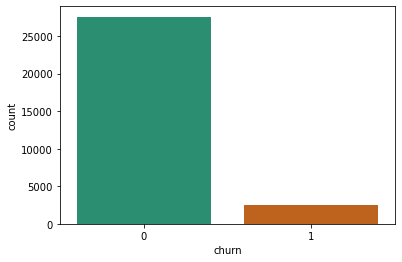

In [71]:
# Let's find out churn/non churn percentage
print((tel_data3['churn'].value_counts()/len(tel_data3))*100)
sns.countplot(x='churn', data=tel_data3, palette = 'Dark2')
plt.show()

**Observation:** As we can see that 92% of the customers do not churn, there is a possibility of class imbalance

As month 9 is the churn phase, we need to drop all columns with suffix \_9 from the dataset.

In [72]:
churn_phase_cols = [col for col in tel_data3.columns if '_9' in col]
tel_data3.drop(columns = churn_phase_cols, inplace=True)
tel_data3.shape

(30001, 149)

Though we have checked correlation for a subset of features earlier, let's check the multicollinearity of all the features of months 6,7,8 again and remove which show correlation above 85%

In [73]:
tel_data3_corr = tel_data3.corr()
upper_tri = tel_data3_corr.where(np.triu(np.ones(tel_data3_corr.shape),k=1).astype(np.bool))
#print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(np.abs(upper_tri[column]) > 0.80)]
to_drop = sorted(to_drop)
print(to_drop)

['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'av_rech_amt_data_8', 'avg_rech_amt_6_7', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'isd_og_mou_7', 'isd_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'monthly_2g_8', 'onnet_mou_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_7', 'sachet_3g_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_rech_amt_8']


In [74]:
# Dropping these column
tel_data4 = tel_data3.drop(columns = to_drop)
tel_data4.shape

(30001, 100)

In [75]:
# Creating lists of column names for each month
mon_6_cols = [col for col in tel_data4.columns if '_6' in col]
mon_7_cols = [col for col in tel_data4.columns if '_7' in col]
mon_8_cols = [col for col in tel_data4.columns if '_8' in col]

In [76]:
max_len = max(len(mon_6_cols), len(mon_7_cols), len(mon_8_cols))
month_columns = pd.DataFrame(columns=['month_6', 'month_7', 'month_8'], index=range(max_len))

In [77]:
if not max_len == len(mon_6_cols):
    mon_6_cols.extend(['']*(max_len - len(mon_6_cols)))
if not max_len == len(mon_7_cols):
    mon_7_cols.extend(['']*(max_len - len(mon_7_cols)))
if not max_len == len(mon_8_cols):
    mon_8_cols.extend(['']*(max_len - len(mon_8_cols)))

In [78]:
# Checking the columns of the three months in tabular format for better understanding
month_columns.month_6 = mon_6_cols
month_columns.month_7 = mon_7_cols
month_columns.month_8 = mon_8_cols
month_columns

,month_6,month_7,month_8
0,arpu_6,arpu_7,arpu_8
1,onnet_mou_6,onnet_mou_7,offnet_mou_8
2,offnet_mou_6,offnet_mou_7,roam_ic_mou_8
3,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_8
4,roam_og_mou_6,roam_og_mou_7,loc_og_t2f_mou_8
5,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2c_mou_8
6,loc_og_t2m_mou_6,loc_og_t2m_mou_7,std_og_t2f_mou_8
7,loc_og_t2f_mou_6,loc_og_t2c_mou_7,std_og_mou_8
8,loc_og_t2c_mou_6,std_og_t2f_mou_7,spl_og_mou_8
9,std_og_t2f_mou_6,std_og_t2c_mou_7,og_others_8


In [79]:
col_sorted = tel_data4.columns.sort_values()
col_sorted

Index(['aon', 'arpu_3g_7', 'arpu_3g_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'aug_vbc_3g', 'churn', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_og_mou_6',
       'jul_vbc_3g', 'jun_vbc_3g', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2t_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'mobile_number', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'onne

### Deriving new variables to understand the data

In [80]:
# Let's check the 'aon' variable

df_aon = tel_data4.groupby('churn')[['aon']].mean().rename(columns={'aon':'aon_mean'})
df_aon['aon_median'] = tel_data4.groupby('churn')[['aon']].median()
df_aon

,aon_mean,aon_median
churn,,
0,1240.228120,880.0
1,860.952478,602.0


**Observation**: customers who tend to churn are relatively newer customers. 

The average revenue per user in good phase of customer is given by arpu_6 and arpu_7. Since we have two seperate averages, let's take an average to these two and drop the other columns.

In [81]:
tel_data4["avg_arpu_6_7"]= (tel_data4['arpu_6']+tel_data4['arpu_7'])/2
tel_data4['avg_arpu_6_7'].head()

0     206.1005 
7     1209.5150
8     435.4720 
21    556.1030 
23    134.1235 
Name: avg_arpu_6_7, dtype: float64

In [82]:
# Let's drop the original columns as we have derived a new column

tel_data4.drop(['arpu_6','arpu_7'], axis=1, inplace=True)
tel_data4.shape

(30001, 99)

In [83]:
tel_data4.avg_arpu_6_7

0        206.1005 
7        1209.5150
8        435.4720 
21       556.1030 
23       134.1235 
           ...    
99981    319.8605 
99984    265.7800 
99986    550.1005 
99988    412.7450 
99997    313.1885 
Name: avg_arpu_6_7, Length: 30001, dtype: float64

In [84]:
tel_data4.arpu_8

0        213.803 
7        3171.480
8        137.362 
21       637.760 
23       366.966 
          ...    
99981    393.474 
99984    118.707 
99986    564.334 
99988    402.080 
99997    606.817 
Name: arpu_8, Length: 30001, dtype: float64

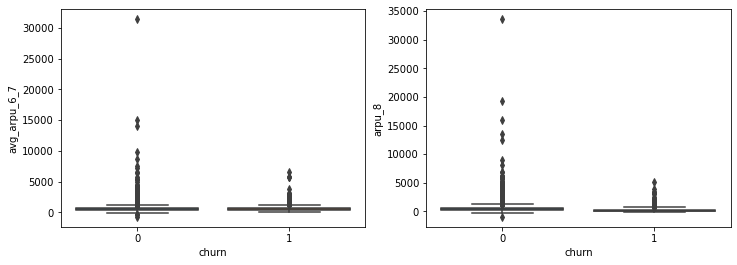

In [85]:
# Visualizing the column created for arpu
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(y='avg_arpu_6_7', x='churn', data=tel_data4)

plt.subplot(1, 2, 2)
sns.boxplot(y='arpu_8', x='churn', data=tel_data4)
plt.show()

**Observation:** 
   - There are some really high revenue generating (>10000) non-churnable customers 
   - Churnable customers are not very high revenue generating (<10000)

Let's check this further after removing outliers

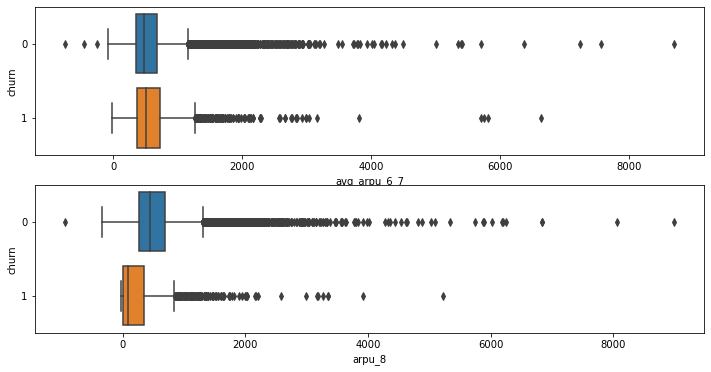

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
sns.boxplot(x='avg_arpu_6_7', y='churn', data=tel_data4[tel_data4.arpu_8<10000], orient='h')

plt.subplot(2, 1, 2)
sns.boxplot(x='arpu_8', y='churn', data=tel_data4[tel_data4.arpu_8<10000], orient='h')
plt.show()

**Observation:** By looking at the median values, we can say that the churnable customers have dropped revenue generation from months 6/7 to 8. We shall check this further through data or call related features. 

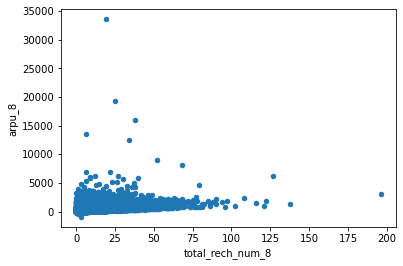

In [87]:
# Scatter plot between total recharge and avg revenue for the 8th month
tel_data4[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

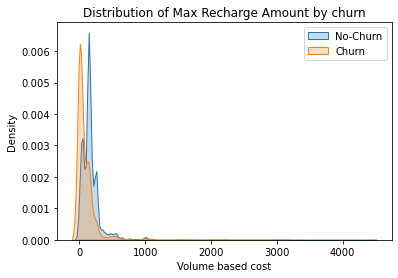

In [88]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(tel_data4.max_rech_amt_8[(tel_data4["churn"] == 0)],
                #color="red",
                 shade = True)
ax = sns.kdeplot(tel_data4.max_rech_amt_8[(tel_data4["churn"] == 1)],
                ax =ax, 
                 #color="yellow",
                 shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

In [89]:
col_sorted = tel_data4.columns.sort_values()
tel_data4[col_sorted]

,aon,arpu_3g_7,arpu_3g_8,arpu_8,aug_vbc_3g,avg_arpu_6_7,churn,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2t_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,mobile_number,monthly_2g_6,monthly_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,onnet_mou_6,onnet_mou_7,overall_rech_amt_6,overall_rech_amt_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_3g_6,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
0,968,1,1,213.803,30.40,206.1005,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,101.20,252,252,252,0.001054,0.000000,0.000473,0.003328,0.003440,0.000206,0.000000,0.000000,0.000000,0.000188,0.000000,0.004846,0.003910,0.004075,0.000475,252,252,252,252.0,252.0,252.0,7000842753,0,0,1,1,1,0.002774,0.001848,0.000000,0.000052,0.0,0.0,0.003553,0.000431,614.0,504.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,3.58,0.001316,0.0,0.0,0.000090,0.000085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,4,3,2,30.13,1.32,5.75,83.57,150.76,109.61
7,802,0,0,3171.480,57.74,1209.5150,1,0.011549,0.010154,0.006505,0.000303,0.002747,0.007654,0.0,19.38,18.74,0,0,779,0.081267,0.051165,0.016247,0.046350,0.049708,0.008773,0.000000,0.000000,0.000000,0.042380,0.057330,0.065253,0.098171,0.007991,0.004240,1580,790,1580,0.0,0.0,0.0,7000701601,0,0,0,0,0,0.054223,0.058669,0.023267,0.000000,0.0,0.0,0.007841,0.006703,1580.0,790.0,0.001183,0.002179,0.002416,0.006289,0.004477,0.007131,0,0.00,0.010628,0.0,0.0,0.004398,0.000000,0.004673,0.038627,0.030139,0.015922,0.016192,0.020676,0.025033,0.0,0.0,0.006757,0.002039,0.007052,0.007217,0.006870,0.005568,0.0,0.0,0.010596,0.036869,0.032269,0.0,5,5,7,0.00,0.00,0.00,0.00,0.00,0.00
8,315,0,0,137.362,21.03,435.4720,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,910.65,122.16,50,0,10,0.000000,0.000000,0.000000,0.012267,0.003137,0.003597,0.000000,0.000000,0.014240,0.000000,0.000000,0.017117,0.015488,0.046200,0.029401,90,154,30,0.0,154.0,23.0,7001524846,0,1,0,0,0,0.011320,0.008341,0.009743,0.000000,0.0,0.0,0.056081,0.043030,437.0,955.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.007355,0.000000,0.000000,0.000000,0.003972,0.000664,0.000115,0.0,0.0,0.000000,0.000100,0.000023,0.015446,0.013119,0.007030,0.0,0.0,0.000000,0.000000,0.000000,3.0,19,21,14,0.00,356.00,0.03,0.00,750.95,11.94
21,720,0,0,637.760,0.00,556.1030,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,30,20,50,0.002462,0.001432,0.004270,0.025188,0.016749,0.000374,0.000000,0.000000,0.000000,0.000512,0.001702,0.019411,0.019295,0.000697,0.000832,50,50,50,0.0,0.0,0.0,7002124215,0,0,0,0,0,0.090636,0.092756,0.070205,0.000000,0.0,0.0,0.013883,0.016194,600.0,680.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011987,0.006224,0.018020,0.0,0.0,0.002575,0.001031,0

In [90]:
tel_data4.total_rech_data_8

0        1.0
7        0.0
8        3.0
21       0.0
23       2.0
        ... 
99981    1.0
99984    5.0
99986    1.0
99988    1.0
99997    4.0
Name: total_rech_data_8, Length: 30001, dtype: float64

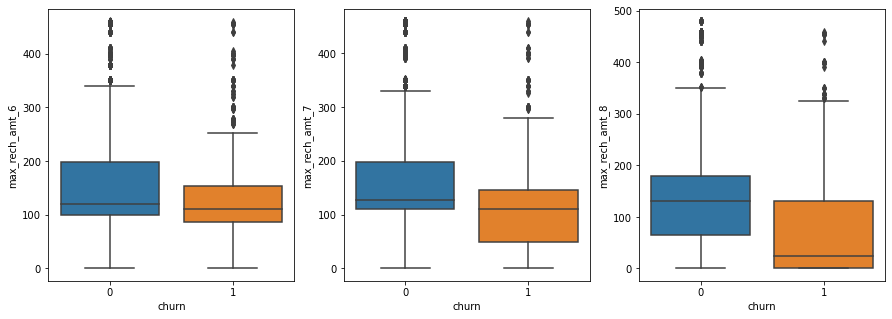

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.boxplot(y='max_rech_amt_6', x='churn', data=tel_data4[tel_data4.max_rech_amt_6<500])

plt.subplot(1, 3, 2)
sns.boxplot(y='max_rech_amt_7', x='churn', data=tel_data4[tel_data4.max_rech_amt_7<500])

plt.subplot(1, 3, 3)
sns.boxplot(y='max_rech_amt_8', x='churn', data=tel_data4[tel_data4.max_rech_amt_8<500])

plt.show()

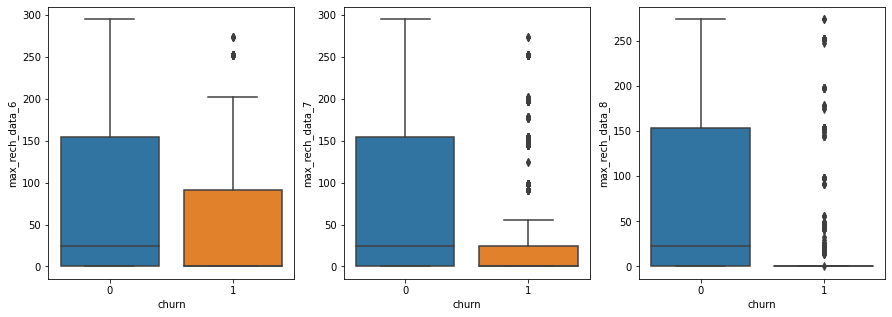

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.boxplot(y='max_rech_data_6', x='churn', data=tel_data4[tel_data4.max_rech_data_6<400])

plt.subplot(1, 3, 2)
sns.boxplot(y='max_rech_data_7', x='churn', data=tel_data4[tel_data4.max_rech_data_7<400])

plt.subplot(1, 3, 3)
sns.boxplot(y='max_rech_data_8', x='churn', data=tel_data4[tel_data4.max_rech_data_8<400])

plt.show()

**Observations:**
- Churnable customers are gradually decreasing their call recharge amount, they have completely stopped the data recharges
- Non-churnable customers remain almost constant

Hence, we decide to bin the 'total_rech_data_8' and 'total_rech_num_8' variables

In [93]:
# Creating categories for month 8 column totalrecharge and their count
tel_data4['total_rech_data_group_8']=pd.cut(tel_data4['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
tel_data4['total_rech_num_group_8']=pd.cut(tel_data4['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges    608  
>25_Recharges      38   
Name: total_rech_data_group_8, dtype: int64


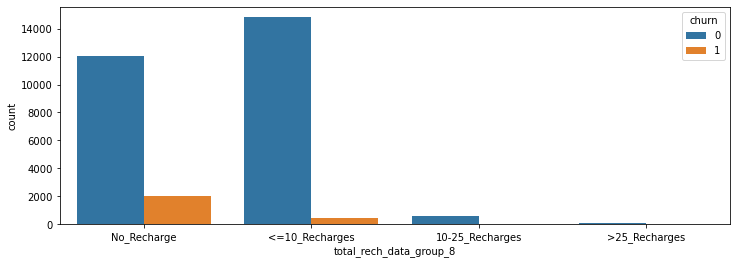



Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges    8245 
>25_Recharges      1824 
No_Recharge        583  
Name: total_rech_num_group_8, dtype: int64


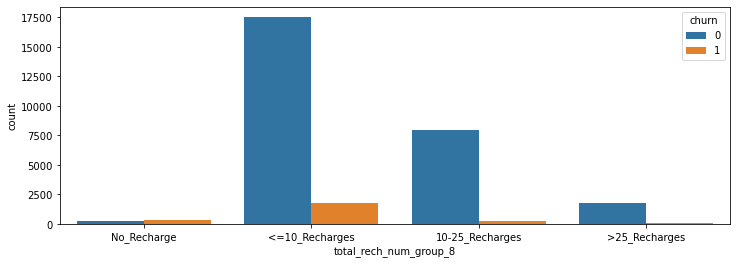

In [94]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=tel_data4,x="total_rech_data_group_8",hue="churn")
print("Distribution of total_rech_data_8 variable\n",tel_data4['total_rech_data_group_8'].value_counts())
plt.show()

print('\n')
plt.figure(figsize=[12,4])
sns.countplot(data=tel_data4,x="total_rech_num_group_8",hue="churn")
print("Distribution of total_rech_num_8 variable\n",tel_data4['total_rech_num_group_8'].value_counts())
plt.show()

**Observations:**

- The 'No_Recharge' category in 'total_rech_data_group_8' has highest count among the churners, gradually decreasing 
- The 'No_Recharge' category in 'total_rech_num_group_8' has higer number of churners than non-churners, also higher than churners of 10_25 and >25 recharge categories. 

Let's check the average data usage of months 6,7 and compare it with month 8.   

In [95]:
vol_cols = [col for col in tel_data4.columns if 'vol' in col]
vol_cols

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

In [96]:
tel_data4['total_data_usage_8'] = tel_data4.vol_2g_mb_8 + tel_data4.vol_3g_mb_8
tel_data4['total_data_usage_8_group']=pd.cut(tel_data4['total_data_usage_8'],[-1, 512, 1024, 2048, 3036],labels=["<500mb","0.5-1gb","1-2gb","2-3gb"])


tel_data4['total_avg_data_usage_6_7'] = ((tel_data4.vol_2g_mb_6 + tel_data4.vol_3g_mb_6) + (tel_data4.vol_2g_mb_7 + tel_data4.vol_3g_mb_7))/2
tel_data4['total_avg_data_usage_6_7_group']=pd.cut(tel_data4['total_avg_data_usage_6_7'],[-1, 512, 1024, 2048, 3036],labels=["<500mb","0.5-1gb","1-2gb","2-3gb"])


In [97]:
tel_data4['total_data_usage_8'].describe()

count    30001.00000
mean     457.40707  
std      967.75013  
min      0.00000    
25%      0.00000    
50%      0.00000    
75%      616.59000  
max      30036.20000
Name: total_data_usage_8, dtype: float64

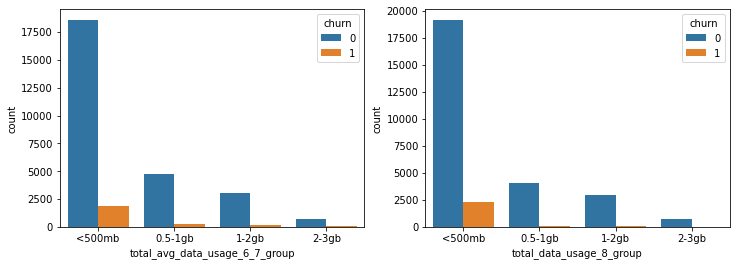

In [98]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot('total_avg_data_usage_6_7_group', hue='churn', data= tel_data4)

plt.subplot(1,2,2)
sns.countplot('total_data_usage_8_group', hue='churn', data= tel_data4)

plt.show()

**Observation:** The data usage of the same customers drop in all categories for the month 8 who are marked as churners. 

Sometimes customers in rural areas just use their phone to receive calls/sms, so incoming calls might not be an indicator of churn. However outgoing calls, for which revenue is generated, can be an indicator of churn. Let's investigate the outgoing calls featuers. 

In [99]:
og_cols = [col for col in tel_data4.columns if 'og' in col]
og_cols_6 = [col for col in og_cols if '_6' in col]
og_cols_7 = [col for col in og_cols if '_7' in col]
og_cols_8 = [col for col in og_cols if '_8' in col]

In [100]:
tel_data4['total_og_6'] = tel_data4[og_cols_6].sum(axis=1)
tel_data4['total_og_7'] = tel_data4[og_cols_7].sum(axis=1)
tel_data4['total_og_avg_6_7'] = (tel_data4['total_og_6'] + tel_data4['total_og_7'])/2

tel_data4['total_og_8'] = tel_data4[og_cols_8].sum(axis=1)

In [101]:
tel_data4['total_og_avg_6_7'].describe()

count    30001.000000
mean     0.106396    
std      0.096848    
min      0.000000    
25%      0.038047    
50%      0.088000    
75%      0.143024    
max      1.566091    
Name: total_og_avg_6_7, dtype: float64

In [102]:
tel_data4['total_og_8'].describe()

count    30001.000000
mean     0.044554    
std      0.064548    
min      0.000000    
25%      0.004932    
50%      0.022893    
75%      0.060596    
max      1.293370    
Name: total_og_8, dtype: float64

In [103]:
tel_data4['total_og_avg_6_7_group']=pd.cut(tel_data4['total_og_avg_6_7'],[-1, 2000, 4000, 6000, 8000, 10000],labels=["very_low","low","medium","high", "very_high"])
tel_data4['total_og_8_group']=pd.cut(tel_data4['total_og_8'],[-1, 2500, 5000, 7500, 10000, 14000],labels=["very_low","low","medium","high", "very_high"])

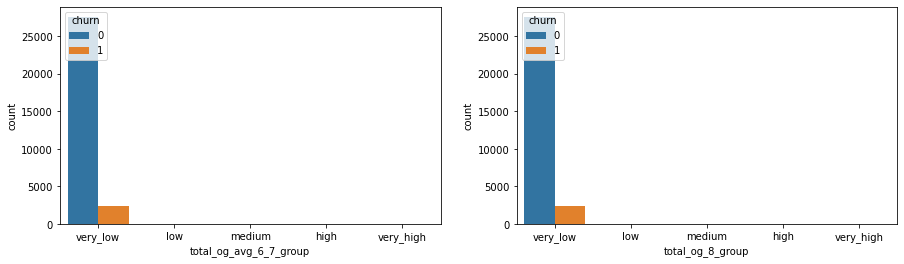

In [104]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot('total_og_avg_6_7_group', hue='churn', data= tel_data4)

plt.subplot(1,2,2)
sns.countplot('total_og_8_group', hue='churn', data= tel_data4)

plt.show()

Hardly anything visible for higher categories. Let's check the numbers in tabular format. 

In [105]:
df_og_6_7 = (pd.crosstab(index=tel_data4['total_og_avg_6_7_group'], columns=tel_data4['churn'], normalize=True)*100).round(3)
df_og_6_7

churn,0,1
total_og_avg_6_7_group,,
very_low,91.864,8.136


In [106]:
df_og_6_7.iloc[:,0].sum(), df_og_6_7.iloc[:,1].sum()

(91.864, 8.136)

In [107]:
df_og_8 = (pd.crosstab(index=tel_data4['total_og_8_group'], columns=tel_data4['churn'], normalize=True)*100).round(3)
df_og_8

churn,0,1
total_og_8_group,,
very_low,91.864,8.136


In [108]:
df_og_8.iloc[:,0].sum(), df_og_8.iloc[:,1].sum()

(91.864, 8.136)

**Observations:** 
- The churners have minimised the outgoing calls service, the 'very_low' category increased and other higher categories decreased. 
- The 'very_high' category was zero in both groups, means they never tend to use much high og calls. 

In [109]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(tel_data4[['total_rech_data_group_8','total_rech_num_group_8', 'total_avg_data_usage_6_7_group', 'total_data_usage_8_group', 'total_og_avg_6_7_group', 'total_og_8_group']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,total_avg_data_usage_6_7_group_0.5-1gb,total_avg_data_usage_6_7_group_1-2gb,total_avg_data_usage_6_7_group_2-3gb,total_data_usage_8_group_0.5-1gb,total_data_usage_8_group_1-2gb,total_data_usage_8_group_2-3gb,total_og_avg_6_7_group_low,total_og_avg_6_7_group_medium,total_og_avg_6_7_group_high,total_og_avg_6_7_group_very_high,total_og_8_group_low,total_og_8_group_medium,total_og_8_group_high,total_og_8_group_very_high
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [110]:
# Adding the results to the master dataframe
tel_data5 = pd.concat([tel_data4, dummy], axis=1)
tel_data5

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,churn,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_data_usage_8,total_data_usage_8_group,total_avg_data_usage_6_7,total_avg_data_usage_6_7_group,total_og_6,total_og_7,total_og_avg_6_7,total_og_8,total_og_avg_6_7_group,total_og_8_group,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,total_avg_data_usage_6_7_group_0.5-1gb,total_avg_data_usage_6_7_group_1-2gb,total_avg_data_usage_6_7_group_2-3gb,total_data_usage_8_group_0.5-1gb,total_data_usage_8_group_1-2gb,total_data_usage_8_group_2-3gb,total_og_avg_6_7_group_low,total_og_avg_6_7_group_medium,total_og_avg_6_7_group_high,total_og_avg_6_7_group_very_high,total_og_8_group_low,total_og_8_group_medium,total_og_8_group_high,total_og_8_group_very_high
0,7000842753,213.803,0.003553,0.000431,0.002774,0.001848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004075,0.000475,0.004846,0.003910,0.000188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000090,0.000085,0.000000,0.000052,0.0,0.0,0.000206,0.003328,0.003440,0.001054,0.000000,0.000473,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001316,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,3,2,252,252,252,252,252,252,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,1,1,0,0,1,1,1,0,968,30.40,0.00,101.20,3.58,614.0,504.0,1,206.1005,<=10_Recharges,<=10_Recharges,115.36,<500mb,132.890,<500mb,0.009251,0.004470,0.006861,0.000000,very_low,very_low,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7000701601,3171.480,0.007841,0.006703,0.054223,0.058669,0.023267,0.001183,0.002179,0.002416,0.006289,0.004477,0.007131,0.007991,0.004240,0.065253,0.098171,0.042380,0.057330,0.000000,0.000000,0.000000,0.010596,0.036869,0.032269,0.0,0.0,0.007217,0.006870,0.005568,0.0,0.004398,0.000000,0.004673,0.000000,0.0,0.0,0.008773,0.046350,0.049708,0.081267,0.051165,0.016247,0.006757,0.002039,0.007052,0.016192,0.020676,0.025033,0.038627,0.030139,0.015922,0.0,0.0,0.010628,0.0,0.0,0.000303,0.002747,0.007654,0.011549,0.010154,0.006505,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1580.0,790.0,1,1209.5150,No_Recharge,<=10_Recharges,0.00,<500mb,0.000,<500mb,0.144122,0.150628,0.147375,0.106971,very_low,very_low,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7001524846,137.362,0.056081,0.0430

In [111]:
# Dropping unwanted columns or base columns from which dummy columns are created
#tel_data5.drop(vol_cols, axis=1, inplace=True)
#tel_data5.drop(og_cols, axis=1, inplace=True)
other_cols = ['total_rech_data_group_8', 'total_rech_num_group_8', 'total_data_usage_8_group',
              'total_avg_data_usage_6_7_group', 'total_og_avg_6_7_group', 
              'total_og_8_group', 'mobile_number', 'sep_vbc_3g']
tel_data5.drop(other_cols, axis=1, inplace=True)
tel_data5

,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,churn,avg_arpu_6_7,total_data_usage_8,total_avg_data_usage_6_7,total_og_6,total_og_7,total_og_avg_6_7,total_og_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,total_avg_data_usage_6_7_group_0.5-1gb,total_avg_data_usage_6_7_group_1-2gb,total_avg_data_usage_6_7_group_2-3gb,total_data_usage_8_group_0.5-1gb,total_data_usage_8_group_1-2gb,total_data_usage_8_group_2-3gb,total_og_avg_6_7_group_low,total_og_avg_6_7_group_medium,total_og_avg_6_7_group_high,total_og_avg_6_7_group_very_high,total_og_8_group_low,total_og_8_group_medium,total_og_8_group_high,total_og_8_group_very_high
0,213.803,0.003553,0.000431,0.002774,0.001848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004075,0.000475,0.004846,0.003910,0.000188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000090,0.000085,0.000000,0.000052,0.0,0.0,0.000206,0.003328,0.003440,0.001054,0.000000,0.000473,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001316,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,3,2,252,252,252,252,252,252,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,1,1,0,0,1,1,1,0,968,30.40,0.00,101.20,614.0,504.0,1,206.1005,115.36,132.890,0.009251,0.004470,0.006861,0.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3171.480,0.007841,0.006703,0.054223,0.058669,0.023267,0.001183,0.002179,0.002416,0.006289,0.004477,0.007131,0.007991,0.004240,0.065253,0.098171,0.042380,0.057330,0.000000,0.000000,0.000000,0.010596,0.036869,0.032269,0.0,0.0,0.007217,0.006870,0.005568,0.0,0.004398,0.000000,0.004673,0.000000,0.0,0.0,0.008773,0.046350,0.049708,0.081267,0.051165,0.016247,0.006757,0.002039,0.007052,0.016192,0.020676,0.025033,0.038627,0.030139,0.015922,0.0,0.0,0.010628,0.0,0.0,0.000303,0.002747,0.007654,0.011549,0.010154,0.006505,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1580.0,790.0,1,1209.5150,0.00,0.000,0.144122,0.150628,0.147375,0.106971,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,137.362,0.056081,0.043030,0.011320,0.008341,0.009743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046200,0.029401,0.017117,0.015488,0.000000,0.000000,0.000000,0.000000,0.014240,0.000000,0.000000,0.000000,0.0,0.0,0.015446,0.013119,0.007030,0.0,0.000000,0.000000,0.007355,0.000000,0.0,0.0,0.003597,0.012267,0.003137,0.000000,0.000000,0.000000,0.0

In [136]:
tel_data5.to_csv("telecom_data_cleaned.csv", index=False)

In [137]:
tel_data5 = pd.read_csv("telecom_data_cleaned.csv")

In [138]:
tel_data5.head()

,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,churn,avg_arpu_6_7,total_data_usage_8,total_avg_data_usage_6_7,total_og_6,total_og_7,total_og_avg_6_7,total_og_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,total_avg_data_usage_6_7_group_0.5-1gb,total_avg_data_usage_6_7_group_1-2gb,total_avg_data_usage_6_7_group_2-3gb,total_data_usage_8_group_0.5-1gb,total_data_usage_8_group_1-2gb,total_data_usage_8_group_2-3gb,total_og_avg_6_7_group_low,total_og_avg_6_7_group_medium,total_og_avg_6_7_group_high,total_og_avg_6_7_group_very_high,total_og_8_group_low,total_og_8_group_medium,total_og_8_group_high,total_og_8_group_very_high
0,213.803,0.003553,0.000431,0.002774,0.001848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004075,0.000475,0.004846,0.003910,0.000188,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000090,0.000085,0.000000,0.000052,0.0,0.0,0.000206,0.003328,0.003440,0.001054,0.000000,0.000473,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001316,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,3,2,252,252,252,252,252,252,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,1,1,0,0,1,1,1,0,968,30.40,0.00,101.20,614.0,504.0,1,206.1005,115.36,132.890,0.009251,0.004470,0.006861,0.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3171.480,0.007841,0.006703,0.054223,0.058669,0.023267,0.001183,0.002179,0.002416,0.006289,0.004477,0.007131,0.007991,0.004240,0.065253,0.098171,0.042380,0.057330,0.0,0.0,0.000000,0.010596,0.036869,0.032269,0.0,0.0,0.007217,0.006870,0.005568,0.0,0.004398,0.000000,0.004673,0.000000,0.0,0.0,0.008773,0.046350,0.049708,0.081267,0.051165,0.016247,0.006757,0.002039,0.007052,0.016192,0.020676,0.025033,0.038627,0.030139,0.015922,0.0,0.0,0.010628,0.0,0.0,0.000303,0.002747,0.007654,0.011549,0.010154,0.006505,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1580.0,790.0,1,1209.5150,0.00,0.000,0.144122,0.150628,0.147375,0.106971,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137.362,0.056081,0.043030,0.011320,0.008341,0.009743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046200,0.029401,0.017117,0.015488,0.000000,0.000000,0.0,0.0,0.014240,0.000000,0.000000,0.000000,0.0,0.0,0.015446,0.013119,0.007030,0.0,0.000000,0.000000,0.007355,0.000000,0.0,0.0,0.003597,0.012267,0.003137,0.000000,0.000000,0.000000,0.000000,0.000100,0.000023,0.0039

In [141]:
tel_data5.shape

(30001, 123)

In [139]:
import gc

del tel_data, tel_data2, tel_data3, tel_data4
gc.collect()

13004

### Model Building

In [112]:
# lets create dataset X for model building.
X = tel_data5.drop(['churn'],axis=1)

In [113]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_arpu_6_7,total_data_usage_8,total_avg_data_usage_6_7,total_og_6,total_og_7,total_og_avg_6_7,total_og_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,total_avg_data_usage_6_7_group_0.5-1gb,total_avg_data_usage_6_7_group_1-2gb,total_avg_data_usage_6_7_group_2-3gb,total_data_usage_8_group_0.5-1gb,total_data_usage_8_group_1-2gb,total_data_usage_8_group_2-3gb,total_og_avg_6_7_group_low,total_og_avg_6_7_group_medium,total_og_avg_6_7_group_high,total_og_avg_6_7_group_very_high,total_og_8_group_low,total_og_8_group_medium,total_og_8_group_high,total_og_8_group_very_high
0,213.803,0.003553,0.000431,0.002774,0.001848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004075,0.000475,0.004846,0.003910,0.000188,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000090,0.000085,0.000000,0.000052,0.0,0.0,0.000206,0.003328,0.003440,0.001054,0.000000,0.000473,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001316,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,3,2,252,252,252,252,252,252,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,1,1,0,0,1,1,1,0,968,30.40,0.00,101.20,614.0,504.0,206.1005,115.36,132.890,0.009251,0.004470,0.006861,0.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3171.480,0.007841,0.006703,0.054223,0.058669,0.023267,0.001183,0.002179,0.002416,0.006289,0.004477,0.007131,0.007991,0.004240,0.065253,0.098171,0.042380,0.057330,0.0,0.0,0.000000,0.010596,0.036869,0.032269,0.0,0.0,0.007217,0.006870,0.005568,0.0,0.004398,0.000000,0.004673,0.000000,0.0,0.0,0.008773,0.046350,0.049708,0.081267,0.051165,0.016247,0.006757,0.002039,0.007052,0.016192,0.020676,0.025033,0.038627,0.030139,0.015922,0.0,0.0,0.010628,0.0,0.0,0.000303,0.002747,0.007654,0.011549,0.010154,0.006505,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1580.0,790.0,1209.5150,0.00,0.000,0.144122,0.150628,0.147375,0.106971,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,137.362,0.056081,0.043030,0.011320,0.008341,0.009743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046200,0.029401,0.017117,0.015488,0.000000,0.000000,0.0,0.0,0.014240,0.000000,0.000000,0.000000,0.0,0.0,0.015446,0.013119,0.007030,0.0,0.000000,0.000000,0.007355,0.000000,0.0,0.0,0.003597,0.012267,0.003137,0.000000,0.000000,0.000000,0.000000,0.000100,0.000023,0.003972,0.00066

In [114]:
# lets create dataset y for model building.
y=tel_data5['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [115]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 122)
Dimension of X_test: (9001, 122)


In [116]:
X_train.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 65002 to 78964
Data columns (total 122 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    arpu_8                                   21000 non-null  float64
 1    onnet_mou_6                              21000 non-null  float64
 2    onnet_mou_7                              21000 non-null  float64
 3    offnet_mou_6                             21000 non-null  float64
 4    offnet_mou_7                             21000 non-null  float64
 5    offnet_mou_8                             21000 non-null  float64
 6    roam_ic_mou_6                            21000 non-null  float64
 7    roam_ic_mou_7                            21000 non-null  float64
 8    roam_ic_mou_8                            21000 non-null  float64
 9    roam_og_mou_6                            21000 non-null  float64
 10   roam_og_mou_7               

In [117]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [118]:
# Scaling the Train data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [119]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_arpu_6_7,total_data_usage_8,total_avg_data_usage_6_7,total_og_6,total_og_7,total_og_avg_6_7,total_og_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,total_avg_data_usage_6_7_group_0.5-1gb,total_avg_data_usage_6_7_group_1-2gb,total_avg_data_usage_6_7_group_2-3gb,total_data_usage_8_group_0.5-1gb,total_data_usage_8_group_1-2gb,total_data_usage_8_group_2-3gb,total_og_avg_6_7_group_low,total_og_avg_6_7_group_medium,total_og_avg_6_7_group_high,total_og_avg_6_7_group_very_high,total_og_8_group_low,total_og_8_group_medium,total_og_8_group_high,total_og_8_group_very_high
65002,0.010184,0.006153,0.008548,0.001586,0.001563,0.002643,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.005721,0.008879,0.002334,0.002313,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.015713,0.0,0.0,0.001404,0.000529,0.001271,0.000000,0.000000,0.000000,0.000080,0.000000,0.0,0.0,0.005586,0.003990,0.007486,0.000000,0.003374,0.000116,0.001344,0.001453,0.000166,0.000000,0.000916,0.000033,0.014603,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.010594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019544,0.028986,0.010204,0.049875,0.113466,0.000000,0.049875,0.000000,0.000000,0.000000,0.292605,0.292605,0.000000,0.003217,0.003013,0.000000,0.059642,0.056173,0.0,0.028571,0.0,0.000000,0.000000,0.142857,0.0625,0.0,0.0,0.213337,0.0,0.106016,0.093655,0.015988,0.019795,0.041645,0.000000,0.059303,0.006018,0.006895,0.006617,0.013173,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
67088,0.022460,0.030984,0.017338,0.116035,0.074299,0.019104,0.0,0.019562,0.028737,0.0,0.062851,0.035842,0.007859,0.007345,0.018432,0.018703,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.120216,0.049682,0.011117,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.003601,0.033124,0.028822,0.000255,0.000000,0.000535,0.000000,0.000000,0.003188,0.009245,0.015621,0.000722,0.000000,0.000000,0.000000,0.0,0.0,0.015688,0.0,0.000000,0.000000,0.000000,0.000000,0.000729,0.000122,0.001440,0.026059,0.101449,0.076531,0.029925,0.029925,0.028771,0.027431,0.016209,0.004495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.067408,0.0,0.000000,0.000000,0.005932,0.009113,0.038474,0.000000,0.000000,0.088751,0.081525,0.086632,0.036307,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36410,0.018456,0.016219,0.013616,0.030127,0.016997,0.012526,0.0,0.000000,0.000000,0.0,0.0000

In [120]:
# scale the test data with same scaler parameters
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_arpu_6_7,total_data_usage_8,total_avg_data_usage_6_7,total_og_6,total_og_7,total_og_avg_6_7,total_og_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,total_avg_data_usage_6_7_group_0.5-1gb,total_avg_data_usage_6_7_group_1-2gb,total_avg_data_usage_6_7_group_2-3gb,total_data_usage_8_group_0.5-1gb,total_data_usage_8_group_1-2gb,total_data_usage_8_group_2-3gb,total_og_avg_6_7_group_low,total_og_avg_6_7_group_medium,total_og_avg_6_7_group_high,total_og_avg_6_7_group_very_high,total_og_8_group_low,total_og_8_group_medium,total_og_8_group_high,total_og_8_group_very_high
7526,0.036539,0.004906,0.007853,0.062382,0.038961,0.021791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005696,0.006818,0.091557,0.080320,0.000259,0.008304,0.0,0.008847,0.000000,0.0,0.0,0.0,0.0,0.0,0.000317,0.001427,0.001292,0.0,0.001740,0.005815,0.001299,0.002230,0.0,0.0,0.013346,0.046197,0.063270,0.009453,0.007216,0.007529,0.000286,0.002731,0.003465,0.005191,0.001472,0.007026,0.003575,0.0,0.001061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.022801,0.086957,0.045918,0.031920,0.038404,0.102270,0.031920,0.012469,0.032367,0.018182,0.000000,0.099035,0.292605,0.000000,0.005901,0.000240,0.000000,0.002644,0.054925,0.000000,0.022222,0.000000,0.0,0.000000,0.0000,0.0625,0.000000,0.739067,0.037420,0.009789,0.032310,0.004874,0.017726,0.042369,0.055014,0.001558,0.067472,0.057163,0.063247,0.008108,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
74907,0.010184,0.000000,0.000000,0.000198,0.000940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000617,0.000000,0.000000,0.0,0.004406,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.001349,0.004985,0.000006,0.000000,0.0,0.0,0.000000,0.000000,0.000043,0.000000,0.000000,0.000073,0.000000,0.000000,0.000149,0.000000,0.000000,0.000019,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000019,0.0,0.0,0.0,0.003257,0.043478,0.010204,0.062843,0.062843,0.000000,0.062843,0.000000,0.000000,0.000000,0.162058,0.162058,0.000000,0.007442,0.074857,0.000000,0.001330,0.016384,0.000000,0.028571,0.000000,0.000000,0.0,0.071429,0.0625,0.0000,0.000000,0.001450,0.001593,0.072643,0.007625,0.004442,0.010236,0.030049,0.000000,0.014644,0.000902,0.003539,0.002351,0.000003,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
99617,0.010506,0.015073,0.003945,0.061240,0.010792,0.001000,0.002171,0.084499,0.012966,0.016174,0.047834,0.002625,0.000382,0.000000,0.000928,0.0000

### Handling Data Imbalance

In [121]:
!pip install imblearn

In [122]:
# Applying SMOTE technique for data imbalance correction
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train_sm Shape: (38520, 122)
Dimension of y_train_sm Shape: (38520,)


,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_arpu_6_7,total_data_usage_8,total_avg_data_usage_6_7,total_og_6,total_og_7,total_og_avg_6_7,total_og_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,total_avg_data_usage_6_7_group_0.5-1gb,total_avg_data_usage_6_7_group_1-2gb,total_avg_data_usage_6_7_group_2-3gb,total_data_usage_8_group_0.5-1gb,total_data_usage_8_group_1-2gb,total_data_usage_8_group_2-3gb,total_og_avg_6_7_group_low,total_og_avg_6_7_group_medium,total_og_avg_6_7_group_high,total_og_avg_6_7_group_very_high,total_og_8_group_low,total_og_8_group_medium,total_og_8_group_high,total_og_8_group_very_high
0,0.010184,0.006153,0.008548,0.001586,0.001563,0.002643,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.005721,0.008879,0.002334,0.002313,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.015713,0.0,0.0,0.001404,0.000529,0.001271,0.000000,0.000000,0.000000,0.000080,0.000000,0.0,0.0,0.005586,0.003990,0.007486,0.000000,0.003374,0.000116,0.001344,0.001453,0.000166,0.000000,0.000916,0.000033,0.014603,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.010594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019544,0.028986,0.010204,0.049875,0.113466,0.000000,0.049875,0.000000,0.000000,0.000000,0.292605,0.292605,0.000000,0.003217,0.003013,0.000000,0.059642,0.056173,0.0,0.028571,0.0,0.000000,0.000000,0.142857,0.0625,0.0,0.0,0.213337,0.0,0.106016,0.093655,0.015988,0.019795,0.041645,0.000000,0.059303,0.006018,0.006895,0.006617,0.013173,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.022460,0.030984,0.017338,0.116035,0.074299,0.019104,0.0,0.019562,0.028737,0.0,0.062851,0.035842,0.007859,0.007345,0.018432,0.018703,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.120216,0.049682,0.011117,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.003601,0.033124,0.028822,0.000255,0.000000,0.000535,0.000000,0.000000,0.003188,0.009245,0.015621,0.000722,0.000000,0.000000,0.000000,0.0,0.0,0.015688,0.0,0.000000,0.000000,0.000000,0.000000,0.000729,0.000122,0.001440,0.026059,0.101449,0.076531,0.029925,0.029925,0.028771,0.027431,0.016209,0.004495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.067408,0.0,0.000000,0.000000,0.005932,0.009113,0.038474,0.000000,0.000000,0.088751,0.081525,0.086632,0.036307,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.018456,0.016219,0.013616,0.030127,0.016997,0.012526,0.0,0.000000,0.000000,0.0,0.000000,0.000000,

## Perform PCA on resampled data

In [123]:
# Importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# Applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [124]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38520, 122)
Dimension of X_test_pca:  (9001, 122)


In [125]:
#Viewing the PCA components
pca.components_

array([[ 7.29505131e-03,  4.23227006e-03,  1.16598780e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.40385018e-03, -2.92908729e-02, -2.18030590e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.74504686e-03, -1.36879205e-02, -1.22319400e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00, -1.52655666e-16, -2.83124162e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [126]:
pca.explained_variance_ratio_

array([2.77776735e-01, 2.30542407e-01, 1.04002730e-01, 6.50649420e-02,
       5.74065048e-02, 5.32846238e-02, 3.68880512e-02, 2.82807576e-02,
       2.18942569e-02, 1.78836766e-02, 1.53146857e-02, 9.98588884e-03,
       9.04450350e-03, 7.65120036e-03, 6.83055997e-03, 5.37090135e-03,
       4.72808748e-03, 3.71840725e-03, 3.44543740e-03, 2.97484833e-03,
       2.35137078e-03, 2.27012457e-03, 1.83747910e-03, 1.77575666e-03,
       1.64086052e-03, 1.56416628e-03, 1.36253907e-03, 1.33495368e-03,
       1.17146372e-03, 1.13880659e-03, 1.05643073e-03, 1.03848922e-03,
       1.00760074e-03, 9.43922070e-04, 8.94573211e-04, 8.58522283e-04,
       7.91460093e-04, 7.83024711e-04, 7.12621052e-04, 6.59045120e-04,
       6.36020457e-04, 6.06475713e-04, 5.98565908e-04, 5.48172096e-04,
       5.34959138e-04, 5.18969179e-04, 5.13753005e-04, 4.70612262e-04,
       4.63514493e-04, 4.42629409e-04, 3.83150895e-04, 3.78575960e-04,
       3.54443813e-04, 3.34619571e-04, 3.13081486e-04, 2.84446479e-04,
      

<BarContainer object of 122 artists>

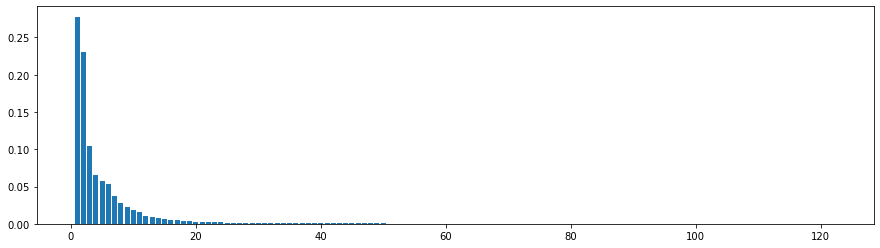

In [127]:
#bar plot to check the components
plt.figure(figsize=(15,4))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

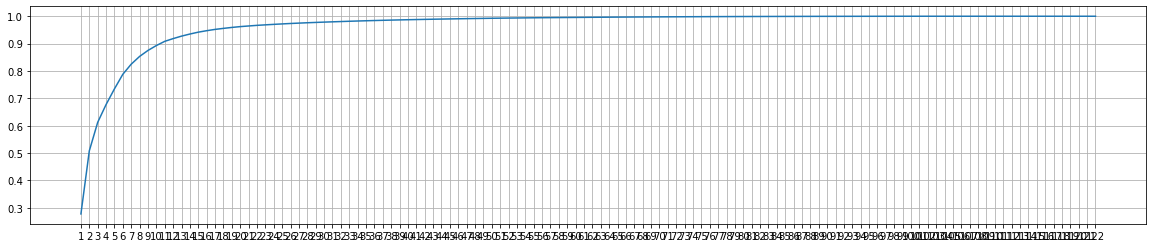

In [128]:
# Scree plot
plt.figure(figsize=(20,4))
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xticks(range(1,len(var_cumu)+1))
plt.grid(which='major', axis='both')
plt.show()

In [129]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([27.8, 50.9, 61.3, 67.8, 73.5, 78.8, 82.5, 85.3, 87.5, 89.3, 90.8,
       91.8, 92.7, 93.5, 94.2, 94.7, 95.2, 95.6, 95.9, 96.2, 96.4, 96.6,
       96.8, 97. , 97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1,
       98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2,
       99.3, 99.4, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5])

First 12 components explain 90% of variability, 18 components explain 95% of variability

In [130]:
pca_12 = PCA(n_components=12)

train_pca_12 = pca_12.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_12.shape)

test_pca_12 = pca_12.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_12.shape)

Dimension for Train dataset using PCA:  (38520, 12)
Dimension for Test dataset using PCA:  (9001, 12)


In [131]:
df_pca_train= pd.DataFrame(train_pca_12, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12'])
df_pca_test= pd.DataFrame(test_pca_12, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12'])


In [132]:
df_pca_train["y_train"]= y_train_sm
df_pca_test["y_test"]= y_test

In [133]:
df_pca_train.to_csv('pca_train.csv', index=False)
df_pca_test.to_csv('pca_test.csv', index=False)

In [135]:
df_pca_train.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,y_train
0,-0.446519,-0.269533,-0.062614,-0.012586,-0.031766,-0.078035,0.034740,0.064995,-0.604253,0.738708,-0.063741,-0.442307,1
1,0.963767,-0.555028,0.000345,-0.024100,-0.005637,-0.243550,-0.108677,0.054985,0.002429,0.012063,0.021059,-0.027890,0
2,1.116512,0.364477,-0.228394,-0.323669,-0.151989,-0.109303,0.456838,-0.211758,-0.051103,-0.117782,0.100535,-0.031931,0
3,0.968410,-0.552817,-0.003951,-0.021738,-0.007651,-0.238324,-0.114416,0.064369,0.055784,0.062423,-0.002022,-0.031700,0
4,1.125142,0.344209,-0.194345,-0.257490,-0.162361,-0.080384,-0.253809,-0.123394,-0.165997,-0.160442,0.110269,-0.013391,0


### Model 1:  Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [143]:
logreg_pca_12 = LogisticRegression()
logreg_pca_12.fit(train_pca_12, y_train_sm)

# Making the predictions
y_pred_12 = logreg_pca_12.predict(test_pca_12)
y_pred_train_12 = logreg_pca_12.predict(train_pca_12)

# Converting the prediction into a dataframe
y_pred_df_12 = pd.DataFrame(y_pred_12, columns=['Prediction'])
print("Dimension of y_pred_df_12: ", y_pred_df_12.shape)

Dimension of y_pred_df_12:  (9001, 1)


In [144]:
# Checking the Confusion matrix
confusion = confusion_matrix(y_test,y_pred_12)
print("Confusion Matirx for y_test & y_pred\n",confusion,"\n")

# Checking the Accuracy of the Predicted model.
print("Train accuracy of the logistic regression model with PCA: ",accuracy_score(y_train_sm,y_pred_train_12))
print("Test accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_12))

Confusion Matirx for y_test & y_pred
 [[5881 2419]
 [ 184  517]] 

Train accuracy of the logistic regression model with PCA:  0.729828660436137
Test accuracy of the logistic regression model with PCA:  0.7108099100099989


In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Sensitivity: 0.7375178316690443
Specificity: 0.7085542168674699


#### Let's check cut-off point based on sensitivity-specificity 

In [147]:
probs = logreg_pca_12.predict_proba(test_pca_12)
y_pred_df_12["Pred prob"] = probs[:,1]
y_pred_df_12.head()
#probs

,Prediction,Pred prob
0,0,0.028284
1,1,0.793569
2,1,0.642728
3,0,0.114285
4,0,0.239525


In [148]:
y_pred_df_12["Actuals"]=y_test.values
y_pred_df_12.head()

,Prediction,Pred prob,Actuals
0,0,0.028284,0
1,1,0.793569,1
2,1,0.642728,0
3,0,0.114285,0
4,0,0.239525,0


In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_df_12[i]= y_pred_df_12["Pred prob"].map(lambda x: 1 if x > i else 0)
y_pred_df_12.head()

,Prediction,Pred prob,Actuals,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.028284,0,1,0,0,0,0,0,0,0,0,0
1,1,0.793569,1,1,1,1,1,1,1,1,1,0,0
2,1,0.642728,0,1,1,1,1,1,1,1,0,0,0
3,0,0.114285,0,1,1,0,0,0,0,0,0,0,0
4,0,0.239525,0,1,1,1,0,0,0,0,0,0,0


In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred_df_12.Actuals, y_pred_df_12[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.077880  1.000000  0.000000
0.1  0.1   0.240529  0.970043  0.178916
0.2  0.2   0.381735  0.937233  0.334819
0.3  0.3   0.527941  0.880171  0.498193
0.4  0.4   0.614376  0.804565  0.598313
0.5  0.5   0.710810  0.737518  0.708554
0.6  0.6   0.795245  0.643367  0.808072
0.7  0.7   0.844240  0.532097  0.870602
0.8  0.8   0.922675  0.196862  0.983976
0.9  0.9   0.924897  0.104137  0.994217


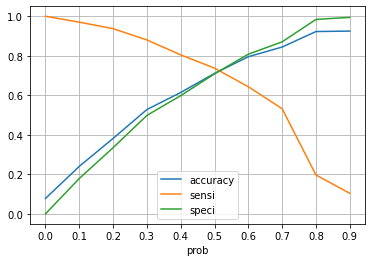

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(which='major', axis='both')
plt.xticks(np.arange(0,1,0.1))
plt.show()

Seems the cutoff point is slightly above 0.5, hence no need to refine further

## Model 2: Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [155]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [156]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [3,4,5,6],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [157]:
# Instantiate the grid search model
grid_search_pca = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [159]:
%%time
grid_search_pca.fit(train_pca_12, y_train_sm)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits
Wall time: 32min 19s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [160]:
rf_best = grid_search_pca.best_estimator_

In [161]:
rf_best

RandomForestClassifier(max_depth=20, max_features=6, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [162]:
print("Train Accuracy :", accuracy_score(y_train_sm, rf_best.predict(train_pca_12)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train_sm, rf_best.predict(train_pca_12)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf_best.predict(test_pca_12)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, rf_best.predict(test_pca_12)))

Train Accuracy : 0.9571651090342679
Train Confusion Matrix:
[[18132  1128]
 [  522 18738]]
--------------------------------------------------
Test Accuracy : 0.8313520719920009
Test Confusion Matrix:
[[7082 1218]
 [ 300  401]]


In [163]:
confusion_rf = confusion_matrix(y_test, rf_best.predict(test_pca_12))
TP_rf = confusion_rf[1,1] # true positive 
TN_rf = confusion_rf[0,0] # true negatives
FP_rf = confusion_rf[0,1] # false positives
FN_rf = confusion_rf[1,0] # false negatives


print("Sensitivity:", TP_rf / float(TP_rf + FN_rf))
print("Specificity:", TN_rf / float(TN_rf + FP_rf))

Sensitivity: 0.572039942938659
Specificity: 0.8532530120481928


Test sensitivity quite low. Let's refine the parameters. We see that some of the values of best_fit tree are the boundary items of the provided list in grid search. let's give some more refined values and check

In [164]:
# df_pca_train = pd.read_csv('pca_train.csv', index_col=0)
# df_pca_test = pd.read_csv('pca_test.csv', index_col=0)

In [165]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [20, 30, 40],
    'min_samples_leaf': [3,4,5],
    'max_features': [6,8,10],
    'n_estimators': [200, 300, 500]
}

# Instantiate the grid search model
grid_search_pca = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [166]:
%%time
grid_search_pca.fit(train_pca_12, y_train_sm)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
Wall time: 1h 14min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20, 30, 40], 'max_features': [6, 8, 10],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [200, 300, 500]},
             scoring='accuracy', verbose=1)

In [167]:
rf_best2 = grid_search_pca.best_estimator_

print(rf_best2, "\n")

print("Train Accuracy :", accuracy_score(y_train_sm, rf_best2.predict(train_pca_12)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train_sm, rf_best2.predict(train_pca_12)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf_best2.predict(test_pca_12)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, rf_best2.predict(test_pca_12)))

RandomForestClassifier(max_depth=40, max_features=10, min_samples_leaf=3,
                       n_estimators=300, n_jobs=-1, random_state=42) 

Train Accuracy : 0.9841640706126688
Train Confusion Matrix:
[[18846   414]
 [  196 19064]]
--------------------------------------------------
Test Accuracy : 0.83524052883013
Test Confusion Matrix:
[[7140 1160]
 [ 323  378]]


In [168]:
confusion_rf = confusion_matrix(y_test, rf_best2.predict(test_pca_12))
TP_rf = confusion_rf[1,1] # true positive 
TN_rf = confusion_rf[0,0] # true negatives
FP_rf = confusion_rf[0,1] # false positives
FN_rf = confusion_rf[1,0] # false negatives


print("Sensitivity:", TP_rf / float(TP_rf + FN_rf))
print("Specificity:", TN_rf / float(TN_rf + FP_rf))

Sensitivity: 0.5392296718972895
Specificity: 0.8602409638554217


In [173]:
gc.collect()

13219

## Model 3: Gradient Boosting

In [169]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from numba import jit, cuda

In [174]:
# Initialize classifier
gb_cl = GradientBoostingClassifier(random_state=42)

# Set parameters
parameters = {"max_depth": [10, 15, 20],
            "learning_rate": [0.1, 0.2, 0.3],
            'min_samples_leaf': [10, 20, 50, 100],
            'max_features':[0.8],
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [5,10,20]
}


# Set grid search model
gb_pca = GridSearchCV(estimator=gb_cl,
                        param_grid=parameters,
                        n_jobs=-1,
                        cv=5,
                        refit=True, verbose=2)


Total 900 estimator computations 

In [175]:
%%time
#@jit(target ="cuda") 
gb_pca.fit(train_pca_12, y_train_sm)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Wall time: 6h 38min 43s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 10, 20], 'max_features': [0.8],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [176]:
print(gb_pca.best_params_)
print(gb_pca.best_score_)
print(gb_pca.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 20, 'max_features': 0.8, 'min_samples_leaf': 10, 'n_estimators': 500}
0.8957684319833852
GradientBoostingClassifier(learning_rate=0.2, max_depth=20, max_features=0.8,
                           min_samples_leaf=10, n_estimators=500,
                           random_state=42)


In [177]:
gb_best = gb_pca.best_estimator_

In [178]:
print("Train Accuracy :", accuracy_score(y_train_sm, gb_best.predict(train_pca_12)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train_sm, gb_best.predict(train_pca_12)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, gb_best.predict(test_pca_12)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, gb_best.predict(test_pca_12)))

Train Accuracy : 1.0
Train Confusion Matrix:
[[19260     0]
 [    0 19260]]
--------------------------------------------------
Test Accuracy : 0.8465726030441062
Test Confusion Matrix:
[[7274 1026]
 [ 355  346]]


In [180]:
confusion_rf = confusion_matrix(y_test, gb_best.predict(test_pca_12))
TP_rf = confusion_rf[1,1] # true positive 
TN_rf = confusion_rf[0,0] # true negatives
FP_rf = confusion_rf[0,1] # false positives
FN_rf = confusion_rf[1,0] # false negatives


print("Sensitivity:", TP_rf / float(TP_rf + FN_rf))
print("Specificity:", TN_rf / float(TN_rf + FP_rf))

Sensitivity: 0.49358059914407987
Specificity: 0.8763855421686747


### Conclusion on the PCA based models:

Since our goal is to find the churnable customers correctly, we focus on the sensitivity measure of the models. 
 - Logistic Regression has sensitivity of 73.75%
 - Random Forest has sensitivity of 53.92%
 - Gradient Boosting has sensitivity of 49.35% 
 
Hence, from our analysis, we find that Logistic Regression model gives best result out of the three supervised models. 

---

## Logistic regression - Interpretable Model

In [228]:
import statsmodels.api as sm

In [229]:
# Logistic regression first model
X_train_sm_stats = sm.add_constant(X_train_sm)
logm1 = sm.GLM(y_train_sm, X_train_sm_stats, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38415
Model Family:                Binomial   Df Model:                          104
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16392.
Date:                Sun, 09 Jan 2022   Deviance:                       32785.
Time:                        21:43:36   Pearson chi2:                 1.84e+07
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.9726      0.131     15.072      0.000       1.716       2.229
arpu_8                                    -75.7763      3.601    -21.043      0.000     -82.834     -68.719
onnet_mou_6                               -39.5788     22.661     -1.747      0.081     -83.993       4.836
onnet_mou_7                                12.0333      8.271      1.455      0.146      -4.177      28.243
offnet_mou_6                              -38.4980     21.376     -1.801      0.072     -80.394       3.399
offnet_mou_7                               19.5486      9.793      1.996      0.046       0.355      38.742
offnet_mou_8                               -8.3745      1.284     -6.522      0.000     -10.891      -5.858
roam_ic_mou_6                               0.1161      0.550      0.211      0.833      -0.962       1.194
roam_ic_mou_7                              -0.8364      0.973     -0.860      0.390      -2.743       1.070
roam_ic_mou_8                               3.1395      0.888      3.535      0.000       1.399       4.880
roam_og_mou_6                               3.9467      3.155      1.251      0.211      -2.237      10.131
roam_og_mou_7                               2.3063      0.918      2.512      0.012       0.507       4.105
roam_og_mou_8                              15.7398      1.362     11.556      0.000      13.070      18.409
loc_og_t2t_mou_6                           21.4898     11.219      1.915      0.055      -0.499      43.479
loc_og_t2t_mou_7                          -11.4556      4.736     -2.419      0.016     -20.737      -2.174
loc_og_t2m_mou_6                           10.6010      6.650      1.594      0.111      -2.434      23.635
loc_og_t2m_mou_7                           -6.5626      1.968     -3.335      0.001     -10.420      -2.706
loc_og_t2f_mou_6                          -11.4527      4.187     -2.735      0.006     -19.659      -3.247
loc_og_t2f_mou_8                           -0.2733      1.643     -0.166      0.868      -3.494       2.947
loc_og_t2c_mou_6                          -14.3796      6.480     -2.219      0.026     -27.081      -1.678
loc_og_t2c_mou_7                            1.1734      2.354      0.499      0.618      -3.440       5.787
loc_og_t2c_mou_8                            4.2831      1.207      3.549      0.000       1.918       6.648
std_og_t2f_mou_6                          -13.3875      8.151     -1.642      0.100     -29.363       2.588
std_og_t2f_mou_7                           -0.6409      3.246     -0.197      0.843      -7.002       5.720
std_og_t2f_mou_8                           -7.6603      2.160     -3.546      0.000     -11.894      -3.426
std_og_t2c_mou_6                        -1.345e-13   2.52e-

In [230]:
from sklearn import metrics

In [231]:
# Making the predictions
y_pred_train = res1.predict(X_train_sm_stats)
y_pred_test = res1.predict(sm.add_constant(X_test))

In [232]:
y_pred_test_1 = y_pred_test.apply(lambda x: 1 if x>=0.5 else 0)

In [233]:
# Checking the Confusion matrix
confusion = metrics.confusion_matrix(y_test,y_pred_test_1)
print("Confusion Matirx for y_test & y_pred\n",confusion,"\n")
print("Test accuracy of first model: ",metrics.accuracy_score(y_test,y_pred_test_1))

Confusion Matirx for y_test & y_pred
 [[6708 1592]
 [ 148  553]] 

Test accuracy of first model:  0.8066881457615821


In [234]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Sensitivity: 0.7888730385164051
Specificity: 0.8081927710843374


We have fairly good accuracy, sensitivity, specificity scores. However, there are 122 features in the dataset. We need to reduce the features as much as possible, while achieving good accuracy metrics.

We shall use RFE and VIF to minimize the number of features

### Feature Selection Using RFE

In [235]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [236]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 40)             # running RFE with 40 variables as output
rfe = rfe.fit(X_train_sm, y_train_sm)

In [237]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 25),
 ('onnet_mou_7', False, 24),
 ('offnet_mou_6', False, 46),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 69),
 ('roam_ic_mou_7', False, 60),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 48),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 47),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2m_mou_6', False, 15),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2f_mou_6', False, 63),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 8),
 ('loc_og_t2c_mou_7', False, 52),
 ('loc_og_t2c_mou_8', False, 12),
 ('std_og_t2f_mou_6', False, 43),
 ('std_og_t2f_mou_7', True, 1),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_t2c_mou_6', False, 73),
 ('std_og_t2c_mou_7', False, 74),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', False, 11),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_6', False, 10),
 ('spl_og_mou_6', False, 50),
 ('spl_og_mou_7', False, 61),
 ('spl_og_mou

In [238]:
col = X_train_sm.columns[rfe.support_]

In [239]:
col

Index(['arpu_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_8', 'spl_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_7', 'total_rech_num_7',
       'total_rech_num_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_6', 'arpu_3g_7', 'aug_vbc_3g', 'avg_arpu_6_7',
       'total_data_usage_8', 'total_avg_data_usage_6_7'],
      dtype='object')

In [240]:
# Logistic regression second model
X_train_sm_stat = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm, X_train_sm_stat, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38479
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17378.
Date:                Sun, 09 Jan 2022   Deviance:                       34756.
Time:                        21:49:38   Pearson chi2:                 2.97e+07
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3261      0.072      4.520      0.000       0.185       0.467
arpu_8                     -79.6305      3.364    -23.669      0.000     -86.224     -73.037
offnet_mou_7                 2.9950      0.563      5.322      0.000       1.892       4.098
offnet_mou_8                -6.0030      1.108     -5.418      0.000      -8.175      -3.831
roam_ic_mou_8                2.9418      0.681      4.319      0.000       1.607       4.277
roam_og_mou_7               -0.2938      0.513     -0.573      0.567      -1.299       0.712
roam_og_mou_8               18.9442      1.136     16.679      0.000      16.718      21.170
loc_og_t2t_mou_7            -5.1925      0.677     -7.675      0.000      -6.518      -3.866
loc_og_t2m_mou_7            -6.6874      0.542    -12.340      0.000      -7.750      -5.625
loc_og_t2f_mou_8            -1.8669      1.408     -1.326      0.185      -4.627       0.894
std_og_t2f_mou_7            -3.1853      1.353     -2.355      0.019      -5.836      -0.534
std_og_t2f_mou_8            -9.1742      2.288     -4.009      0.000     -13.659      -4.689
std_og_mou_6                 0.1032      0.276      0.375      0.708      -0.437       0.643
std_og_mou_8                 4.7500      0.737      6.443      0.000       3.305       6.195
spl_og_mou_8                -1.9875      0.930     -2.136      0.033      -3.811      -0.164
loc_ic_t2m_mou_7            -3.3422      0.454     -7.366      0.000      -4.232      -2.453
loc_ic_t2f_mou_8           -15.1676      1.380    -10.989      0.000     -17.873     -12.462
std_ic_t2t_mou_6            14.7296      1.624      9.069      0.000      11.546      17.913
std_ic_t2t_mou_8           -23.1232      2.481     -9.321      0.000     -27.986     -18.261
std_ic_t2m_mou_8            -5.9766      1.162     -5.143      0.000      -8.254      -3.699
std_ic_t2f_mou_8            -8.3039      2.499     -3.323      0.001     -13.202      -3.406
spl_ic_mou_8                -3.8022      1.005     -3.783      0.000      -5.772      -1.832
isd_ic_mou_6                 4.0645      0.950      4.277      0.000       2.202       5.927
ic_others_7                 -7.0665      1.851     -3.818      0.000     -10.694      -3.439
total_rech_num_7             5.7246      0.382     14.994      0.000       4.976       6.473
total_rech_num_8           -17.4279      0.759    -22.972      0.000     -18.915     -15.941
max_rech_amt_6               2.5737      0.527      4.881      0.000       1.540       3.607
max_rech_amt_7               4.5127      0.477      9.461      0.000       3.578       5.448
max_rech_amt_8               1.0167      0.711      1.430      0.153      -0.377       2.410
last_day_rch_amt_6           2.0856      0.600      3.478      0.001       0.910       3.261
last_day_rch_a

In [241]:
# Making the predictions
y_pred_test = res2.predict(sm.add_constant(X_test[col]))

y_pred_test_1 = y_pred_test.apply(lambda x: 1 if x>=0.5 else 0)

In [242]:
# Checking the Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test_1)
print("Confusion Matirx for y_test & y_pred\n",confusion,"\n")
print("Test accuracy of second model: ", metrics.accuracy_score(y_test,y_pred_test_1))

Confusion Matirx for y_test & y_pred
 [[6636 1664]
 [ 142  559]] 

Test accuracy of second model:  0.7993556271525386


In [243]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Sensitivity: 0.797432239657632
Specificity: 0.7995180722891566


Sensitivity increased 1%, let's use VIF to check the features further 

In [244]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [245]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
37,avg_arpu_6_7,18.44
0,arpu_8,14.00
39,total_avg_data_usage_6_7,8.64
23,total_rech_num_7,6.67
24,total_rech_num_8,5.96
2,offnet_mou_8,5.68
34,vol_3g_mb_6,5.26
27,max_rech_amt_8,4.97
25,max_rech_amt_6,4.82
1,offnet_mou_7,4.46


let's remove 'avg_arpu_6_7' and 'arpu_8' and check VIF again

In [246]:
col2 = [c for c in col if c not in ('avg_arpu_6_7', 'arpu_8')]

In [247]:
vif = pd.DataFrame()
vif['Features'] = col2
vif['VIF'] = [variance_inflation_factor(X_train_sm[col2].values, i) for i in range(X_train_sm[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
37,total_avg_data_usage_6_7,8.41
1,offnet_mou_8,5.50
33,vol_3g_mb_6,5.26
22,total_rech_num_7,5.13
23,total_rech_num_8,5.00


In [248]:
col3 = [c for c in col2 if c not in ('total_avg_data_usage_6_7')]

In [249]:
vif = pd.DataFrame()
vif['Features'] = col3
vif['VIF'] = [variance_inflation_factor(X_train_sm[col3].values, i) for i in range(X_train_sm[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
1,offnet_mou_8,5.49
22,total_rech_num_7,5.04
23,total_rech_num_8,4.99
26,max_rech_amt_8,4.57
0,offnet_mou_7,4.42


In [250]:
col4 = [c for c in col3 if c!='offnet_mou_8']

In [251]:
vif = pd.DataFrame()
vif['Features'] = col4
vif['VIF'] = [variance_inflation_factor(X_train_sm[col4].values, i) for i in range(X_train_sm[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
22,total_rech_num_8,4.87
21,total_rech_num_7,4.78
25,max_rech_amt_8,4.57
23,max_rech_amt_6,4.34
35,total_data_usage_8,3.76


VIF score below 5 is acceptable. So we go ahead with this column list, however we shall still try analyse further based on coefficient values and p-values

In [252]:
len(vif)

36

In [253]:
# Logistic regression third model
X_train_sm_stat = sm.add_constant(X_train_sm[col4])
logm3 = sm.GLM(y_train_sm, X_train_sm_stat, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38483
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17790.
Date:                Sun, 09 Jan 2022   Deviance:                       35581.
Time:                        21:53:33   Pearson chi2:                 3.31e+09
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0005      0.034     29.301      0.000       0.934       1.067
offnet_mou_7           1.5700      0.392      4.006      0.000       0.802       2.338
roam_ic_mou_8          2.4601      0.603      4.078      0.000       1.278       3.642
roam_og_mou_7          1.3845      0.473      2.929      0.003       0.458       2.311
roam_og_mou_8         12.2103      0.931     13.111      0.000      10.385      14.036
loc_og_t2t_mou_7      -5.0198      0.651     -7.710      0.000      -6.296      -3.744
loc_og_t2m_mou_7      -6.7291      0.499    -13.477      0.000      -7.708      -5.751
loc_og_t2f_mou_8      -6.0262      1.428     -4.219      0.000      -8.825      -3.227
std_og_t2f_mou_7      -1.2200      1.295     -0.942      0.346      -3.757       1.317
std_og_t2f_mou_8     -12.3979      2.331     -5.319      0.000     -16.966      -7.830
std_og_mou_6           3.4892      0.227     15.374      0.000       3.044       3.934
std_og_mou_8          -5.3041      0.584     -9.079      0.000      -6.449      -4.159
spl_og_mou_8          -2.2643      0.914     -2.476      0.013      -4.057      -0.472
loc_ic_t2m_mou_7      -3.2088      0.439     -7.318      0.000      -4.068      -2.349
loc_ic_t2f_mou_8     -15.1522      1.351    -11.217      0.000     -17.800     -12.505
std_ic_t2t_mou_6      15.4164      1.581      9.749      0.000      12.317      18.516
std_ic_t2t_mou_8     -22.7803      2.422     -9.405      0.000     -27.527     -18.033
std_ic_t2m_mou_8      -7.5464      1.199     -6.293      0.000      -9.897      -5.196
std_ic_t2f_mou_8      -8.6486      2.482     -3.485      0.000     -13.512      -3.785
spl_ic_mou_8          -3.6897      0.942     -3.919      0.000      -5.535      -1.844
isd_ic_mou_6           4.0029      0.918      4.362      0.000       2.204       5.801
ic_others_7           -7.4465      1.835     -4.058      0.000     -11.043      -3.850
total_rech_num_7       9.6918      0.351     27.643      0.000       9.005      10.379
total_rech_num_8     -28.1132      0.668    -42.102      0.000     -29.422     -26.804
max_rech_amt_6         4.1959      0.531      7.906      0.000       3.156       5.236
max_rech_amt_7         5.0994      0.484     10.544      0.000       4.152       6.047
max_rech_amt_8        -4.2525      0.640     -6.642      0.000      -5.507      -2.998
last_day_rch_amt_6     3.3884      0.604      5.614      0.000       2.206       4.571
last_day_rch_amt_7    -6.4482      0.559    -11.539      0.000      -7.543      -5.353
last_day_rch_amt_8   -22.8449      0.800    -28.556      0.000     -24.413     -21.277
total_rech_data_8    -11.5898      0.607    -19.084      0.000     -12.780     -10.400
max_rech_data_8       -2.5808      0.372     -6.938      0.000      -3.310      -1.852
vol_2g_mb_8          -13.8265      1.1

In [254]:
# Making the predictions
y_pred_test = res3.predict(sm.add_constant(X_test[col4]))
y_pred_test_1 = y_pred_test.apply(lambda x: 1 if x>=0.5 else 0)

# Checking the Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test_1)
print("Confusion Matirx for y_test & y_pred\n",confusion,"\n")
print("Test accuracy of third model: ", metrics.accuracy_score(y_test,y_pred_test_1))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Confusion Matirx for y_test & y_pred
 [[6546 1754]
 [ 146  555]] 

Test accuracy of third model:  0.7889123430729919
Sensitivity: 0.7917261055634808
Specificity: 0.7886746987951807


In [255]:
# Drop the columns that have high p-value (>0.05)

col_to_drop = ['std_og_t2f_mou_7', 'total_data_usage_8']

In [256]:
col5 = [c for c in col4 if c not in col_to_drop]
len(col5)

34

In [257]:
# Logistic regression fourth model
X_train_sm_stat = sm.add_constant(X_train_sm[col5])
logm4 = sm.GLM(y_train_sm, X_train_sm_stat, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38485
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17792.
Date:                Sun, 09 Jan 2022   Deviance:                       35585.
Time:                        22:00:01   Pearson chi2:                 3.37e+09
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0092      0.034     29.909      0.000       0.943       1.075
offnet_mou_7           1.5507      0.391      3.967      0.000       0.785       2.317
roam_ic_mou_8          2.4709      0.603      4.097      0.000       1.289       3.653
roam_og_mou_7          1.3922      0.472      2.948      0.003       0.467       2.318
roam_og_mou_8         12.1966      0.928     13.137      0.000      10.377      14.016
loc_og_t2t_mou_7      -5.0187      0.651     -7.706      0.000      -6.295      -3.742
loc_og_t2m_mou_7      -6.7294      0.499    -13.480      0.000      -7.708      -5.751
loc_og_t2f_mou_8      -5.9653      1.426     -4.182      0.000      -8.761      -3.170
std_og_t2f_mou_8     -13.4572      2.043     -6.587      0.000     -17.462      -9.453
std_og_mou_6           3.4722      0.226     15.336      0.000       3.028       3.916
std_og_mou_8          -5.2824      0.584     -9.047      0.000      -6.427      -4.138
spl_og_mou_8          -2.3340      0.915     -2.550      0.011      -4.128      -0.540
loc_ic_t2m_mou_7      -3.1944      0.438     -7.289      0.000      -4.053      -2.335
loc_ic_t2f_mou_8     -15.1178      1.350    -11.194      0.000     -17.765     -12.471
std_ic_t2t_mou_6      15.4350      1.580      9.771      0.000      12.339      18.531
std_ic_t2t_mou_8     -22.8002      2.424     -9.406      0.000     -27.551     -18.049
std_ic_t2m_mou_8      -7.5241      1.199     -6.276      0.000      -9.874      -5.174
std_ic_t2f_mou_8      -8.8853      2.482     -3.580      0.000     -13.750      -4.021
spl_ic_mou_8          -3.6587      0.943     -3.879      0.000      -5.507      -1.810
isd_ic_mou_6           4.0051      0.917      4.367      0.000       2.207       5.803
ic_others_7           -7.4514      1.833     -4.065      0.000     -11.044      -3.858
total_rech_num_7       9.6734      0.350     27.611      0.000       8.987      10.360
total_rech_num_8     -28.1330      0.667    -42.161      0.000     -29.441     -26.825
max_rech_amt_6         4.2070      0.531      7.927      0.000       3.167       5.247
max_rech_amt_7         5.0568      0.483     10.475      0.000       4.111       6.003
max_rech_amt_8        -4.2429      0.640     -6.635      0.000      -5.496      -2.990
last_day_rch_amt_6     3.3725      0.603      5.590      0.000       2.190       4.555
last_day_rch_amt_7    -6.4642      0.558    -11.581      0.000      -7.558      -5.370
last_day_rch_amt_8   -22.8468      0.799    -28.585      0.000     -24.413     -21.280
total_rech_data_8    -11.7245      0.602    -19.471      0.000     -12.905     -10.544
max_rech_data_8       -2.9149      0.318     -9.170      0.000      -3.538      -2.292
vol_2g_mb_8          -14.1411      1.093    -12.944      0.000     -16.282     -12.000
vol_3g_mb_6            8.3418      1.0

In [258]:
# Making the predictions
y_pred_test = res4.predict(sm.add_constant(X_test[col5]))
y_pred_test_1 = y_pred_test.apply(lambda x: 1 if x>=0.5 else 0)

# Checking the Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test_1)
print("Confusion Matirx for y_test & y_pred\n",confusion,"\n")
print("Test accuracy of fourth model: ", metrics.accuracy_score(y_test,y_pred_test_1))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Confusion Matirx for y_test & y_pred
 [[6548 1752]
 [ 146  555]] 

Test accuracy of fourth model:  0.7891345406065993
Sensitivity: 0.7917261055634808
Specificity: 0.7889156626506024


All metrices are almost same. Now let's try to remove the high -ve coefficient values and check the measures.

In [260]:
col_to_drop = ['std_og_t2f_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8']

col6 = [c for c in col5 if c not in col_to_drop]
len(col6)

27

In [261]:
# Logistic regression fifth model
X_train_sm_stat = sm.add_constant(X_train_sm[col6])
logm5 = sm.GLM(y_train_sm, X_train_sm_stat, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38492
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20669.
Date:                Sun, 09 Jan 2022   Deviance:                       41338.
Time:                        22:10:21   Pearson chi2:                 2.32e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5639      0.030     18.505      0.000       0.504       0.624
offnet_mou_7           5.1167      0.362     14.133      0.000       4.407       5.826
roam_ic_mou_8          1.8099      0.710      2.550      0.011       0.419       3.201
roam_og_mou_7          2.4157      0.442      5.462      0.000       1.549       3.283
roam_og_mou_8          6.5956      1.070      6.163      0.000       4.498       8.693
loc_og_t2t_mou_7      -5.2235      0.601     -8.694      0.000      -6.401      -4.046
loc_og_t2m_mou_7      -7.6409      0.457    -16.712      0.000      -8.537      -6.745
loc_og_t2f_mou_8     -15.8441      1.352    -11.717      0.000     -18.494     -13.194
std_og_mou_6           6.2908      0.217     29.036      0.000       5.866       6.715
std_og_mou_8         -16.7657      0.539    -31.118      0.000     -17.822     -15.710
spl_og_mou_8          -9.1433      1.074     -8.510      0.000     -11.249      -7.037
loc_ic_t2m_mou_7      -3.5369      0.406     -8.711      0.000      -4.333      -2.741
std_ic_t2t_mou_6       4.9767      1.082      4.597      0.000       2.855       7.098
std_ic_t2m_mou_8     -11.4129      1.193     -9.567      0.000     -13.751      -9.075
std_ic_t2f_mou_8     -18.1414      2.636     -6.881      0.000     -23.309     -12.974
spl_ic_mou_8          -6.0204      0.873     -6.897      0.000      -7.731      -4.310
isd_ic_mou_6           4.4299      0.935      4.739      0.000       2.598       6.262
ic_others_7           -5.9824      1.452     -4.119      0.000      -8.829      -3.136
total_rech_num_7      -1.4305      0.216     -6.620      0.000      -1.854      -1.007
max_rech_amt_6         5.5224      0.539     10.250      0.000       4.466       6.578
max_rech_amt_7         8.4603      0.501     16.892      0.000       7.479       9.442
max_rech_amt_8       -18.4172      0.632    -29.128      0.000     -19.656     -17.178
last_day_rch_amt_6     3.5200      0.595      5.912      0.000       2.353       4.687
last_day_rch_amt_7    -6.1932      0.559    -11.071      0.000      -7.290      -5.097
max_rech_data_8       -7.0303      0.311    -22.614      0.000      -7.640      -6.421
vol_3g_mb_6           13.2328      0.895     14.793      0.000      11.480      14.986
arpu_3g_7              0.8452      0.399      2.121      0.034       0.064       1.626
aug_vbc_3g           -11.2795      0.565    -19.975      0.000     -12.386     -10.173
======================================================================================
"""

In [262]:
# Making the predictions
y_pred_test = res5.predict(sm.add_constant(X_test[col6]))
y_pred_test_1 = y_pred_test.apply(lambda x: 1 if x>=0.5 else 0)

# Checking the Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test_1)
print("Confusion Matirx for y_test & y_pred\n",confusion,"\n")
print("Test accuracy of fifth model: ", metrics.accuracy_score(y_test,y_pred_test_1))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Confusion Matirx for y_test & y_pred
 [[6209 2091]
 [ 171  530]] 

Test accuracy of fifth model:  0.7486945894900566
Sensitivity: 0.7560627674750356
Specificity: 0.7480722891566265


We see about 4-5% drop in the metrics, so we consider 4th model as the final model, i.e. with col 5 

In [263]:
# Final Model
logreg = LogisticRegression()
logreg.fit(X_train_sm[col5], y_train_sm)

# Making the predictions
y_pred = logreg.predict(X_test[col5])

# Converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred, columns=['Prediction'])
print("Dimension of y_pred_df: ", y_pred_df.shape)

Dimension of y_pred_df:  (9001, 1)


In [264]:
# Checking the Confusion matrix
confusion = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matirx for y_test & y_pred\n",confusion,"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model: ", metrics.accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6526 1774]
 [ 148  553]] 

Accuracy of the logistic regression model:  0.7864681702033107


In [265]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [266]:
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Sensitivity: 0.7888730385164051
Specificity: 0.7862650602409639


#### Let's check cut-off point based on sensitivity-specificity 

In [267]:
probs = logreg.predict_proba(X_test[col5])
y_pred_df["Pred prob"] = probs[:,1]
y_pred_df["Actuals"]=y_test.values
y_pred_df.head()
#probs

,Prediction,Pred prob,Actuals
0,0,0.064361,0
1,1,0.839064,1
2,1,0.837948,0
3,0,0.157830,0
4,0,0.341930,0


In [268]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_df[i]= y_pred_df["Pred prob"].map(lambda x: 1 if x > i else 0)
y_pred_df.head()

,Prediction,Pred prob,Actuals,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.064361,0,1,0,0,0,0,0,0,0,0,0
1,1,0.839064,1,1,1,1,1,1,1,1,1,1,0
2,1,0.837948,0,1,1,1,1,1,1,1,1,1,0
3,0,0.157830,0,1,1,0,0,0,0,0,0,0,0
4,0,0.341930,0,1,1,1,1,0,0,0,0,0,0


In [269]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred_df.Actuals, y_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.077880  1.000000  0.000000
0.1  0.1   0.259082  0.977175  0.198434
0.2  0.2   0.417065  0.944365  0.372530
0.3  0.3   0.564604  0.904422  0.535904
0.4  0.4   0.686146  0.837375  0.673373
0.5  0.5   0.786468  0.788873  0.786265
0.6  0.6   0.856794  0.733238  0.867229
0.7  0.7   0.898900  0.610556  0.923253
0.8  0.8   0.917454  0.345221  0.965783
0.9  0.9   0.922453  0.115549  0.990602


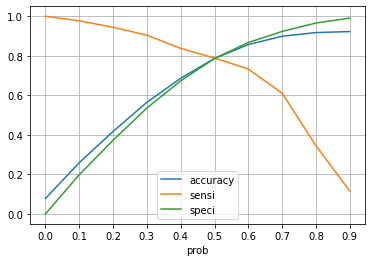

In [270]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.1))
plt.grid(which='major', axis='both')
plt.show()

Seems the cut-off point is very close to 0.5, hence no chanage in the model

In [271]:
logreg.coef_

array([[  1.37059789,   2.79821249,   2.60974435,   6.38114479,
         -4.18138718,  -6.09506252,  -4.52028037,  -4.77315177,
          4.02395061,  -6.87248864,  -2.31890781,  -3.60474154,
         -8.06831371,   3.04144826,  -4.39703551,  -4.44985393,
         -2.9727965 ,  -2.20351283,   1.71158158,  -2.12829512,
          6.68548919, -20.9509372 ,   3.65565825,   3.5335601 ,
         -5.95578209,   2.58495542,  -4.50525818, -14.75426292,
        -10.8680315 ,  -3.64845807,  -8.00092022,   5.13449759,
          2.51591822,  -7.14648088]])

In [275]:
# get important features 
coeff_df = pd.DataFrame(zip(col5, np.transpose(logreg.coef_[0])), columns=['features', 'coef']) 
coeff_df.sort_values(by='coef', ascending=False)[:10]


,features,coef
20,total_rech_num_7,6.685489
3,roam_og_mou_8,6.381145
31,vol_3g_mb_6,5.134498
8,std_og_mou_6,4.023951
22,max_rech_amt_6,3.655658
23,max_rech_amt_7,3.533560
13,std_ic_t2t_mou_6,3.041448
1,roam_ic_mou_8,2.798212
2,roam_og_mou_7,2.609744
25,last_day_rch_amt_6,2.584955


The top 10 features are: 
 - total_rech_num_7
 - roam_og_mou_8
 - vol_3g_mb_6
 - std_og_mou_6
 - max_rech_amt_6
 - max_rech_amt_7
 - std_ic_t2t_mou_6
 - roam_ic_mou_8
 - roam_og_mou_7
 - last_day_rch_amt_6
 

In [280]:
features = list(coeff_df.features[:10])
features.append('churn')
tel_data_final= tel_data5[features]
tel_data_final.head()

,offnet_mou_7,roam_ic_mou_8,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_8,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_8,churn
0,0.001848,0.000000,0.000000,0.000000,0.000475,0.003910,0.000000,0.000000,0.000000,0.000000,1
1,0.058669,0.002416,0.004477,0.007131,0.004240,0.098171,0.057330,0.032269,0.007217,0.005568,1
2,0.008341,0.000000,0.000000,0.000000,0.029401,0.015488,0.000000,0.000000,0.015446,0.007030,0
3,0.092756,0.000000,0.000000,0.000000,0.000832,0.019295,0.001702,0.000000,0.090512,0.067152,0
4,0.009244,0.000000,0.000000,0.000000,0.006845,0.018215,0.000000,0.000000,0.000280,0.002833,0


In [284]:
tel_data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
offnet_mou_7,30001.0,0.039483,0.051580,0.0,0.007835,0.022898,0.051229,1.000000
roam_ic_mou_8,30001.0,0.000976,0.005667,0.0,0.000000,0.000000,0.000000,0.318419
roam_og_mou_7,30001.0,0.007261,0.034228,0.0,0.000000,0.000000,0.000000,1.000000
roam_og_mou_8,30001.0,0.003830,0.019679,0.0,0.000000,0.000000,0.000000,1.000000
loc_og_t2t_mou_7,30001.0,0.011666,0.032519,0.0,0.000707,0.003488,0.010645,1.000000
loc_og_t2m_mou_7,30001.0,0.036068,0.053001,0.0,0.004977,0.017919,0.045858,1.000000
loc_og_t2f_mou_8,30001.0,0.006445,0.021004,0.0,0.000000,0.000140,0.004394,1.000000
std_og_t2f_mou_8,30001.0,0.003111,0.021153,0.0,0.000000,0.000000,0.000000,1.000000
std_og_mou_6,30001.0,0.041598,0.072258,0.0,0.000096,0.006331,0.055539,1.000000
std_og_mou_8,30001.0,0.022633,0.043664,0.0,0.000000,0.002529,0.026708,1.000000


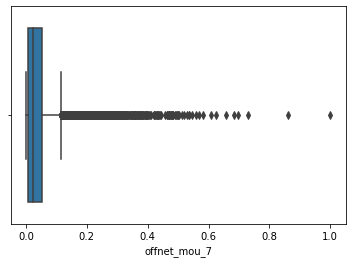

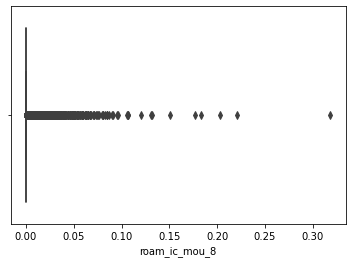

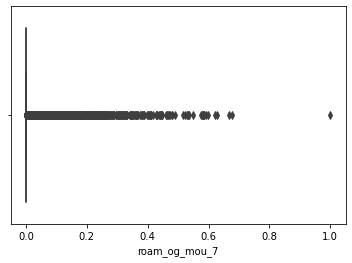

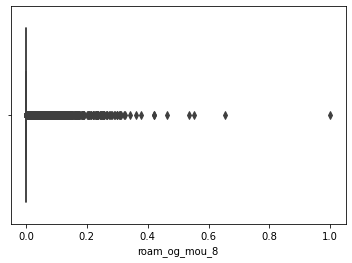

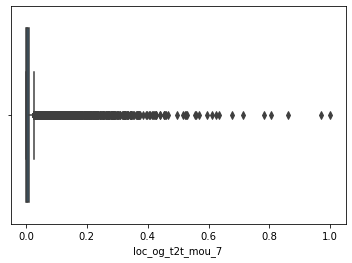

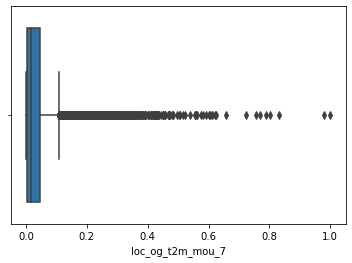

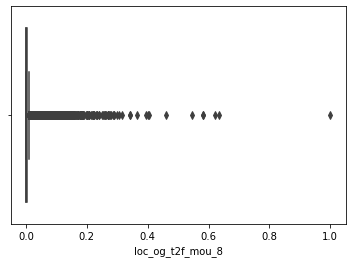

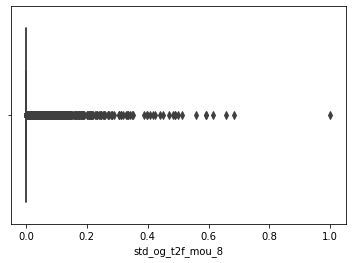

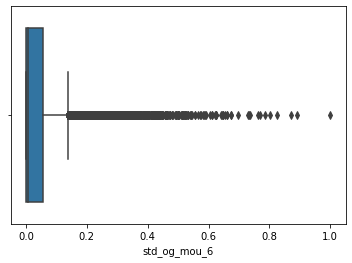

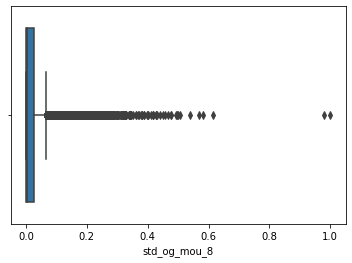

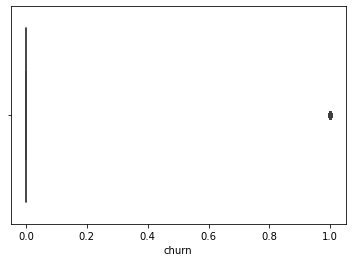

In [295]:
for i in tel_data_final.columns:
    plt.figure()
    sns.boxplot(tel_data_final[i], hue =tel_data_final['churn'], orient='h')
    plt.show()

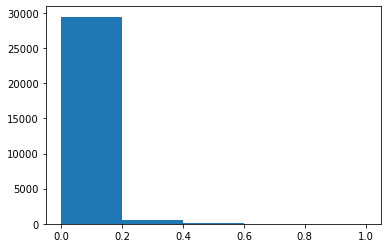

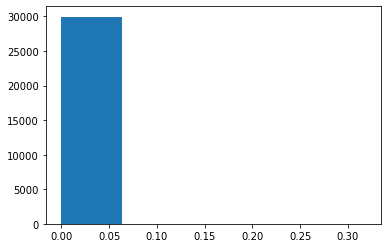

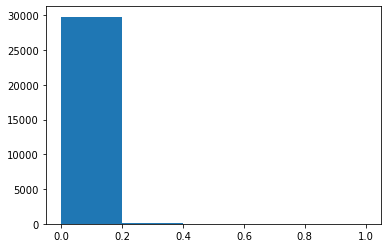

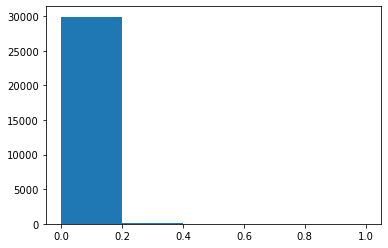

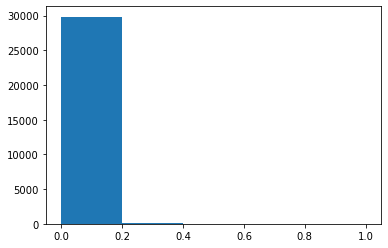

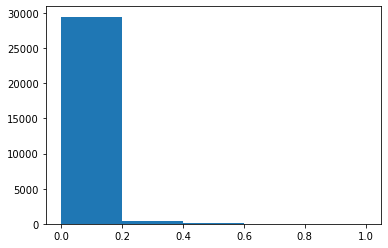

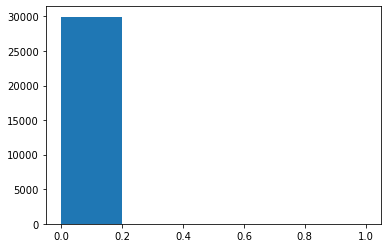

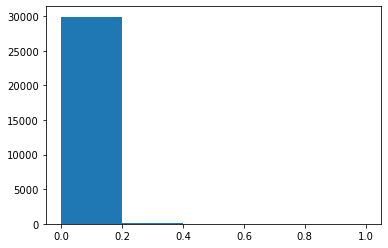

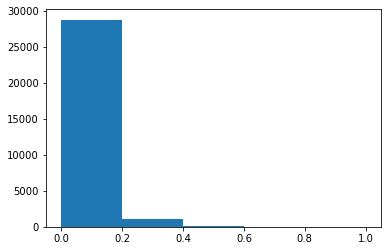

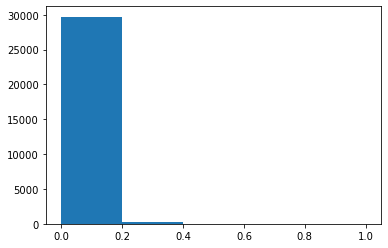

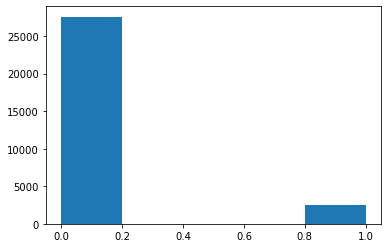

In [296]:
for i in tel_data_final.columns:
    plt.figure()
    plt.hist(tel_data_final[i], bins=5)
    plt.show()

**Observation:** We see mostly thsese features do not have values or have very low values. Since these are indicators of churnable customers, so these values are justified.

## Recommendations

- Customers who tend to churn are relatively newer customers. Company can give some discounts to new customers for completing some number of months with their service. 
- The customers who are not generating revenue overall, are the ones tend to churn. Company can give some relatively cheaper call/data recharge options to attract customres. 
- Churnable customers have stopped internet usage, company can check the features such as vol_3g_mb_6 and provide some cheaper data pack to attract customers.
- Company can check standard and roaming outgoing call durations (roam_og_mou_8, std_og_mou_6, roam_og_mou_7) and recharge amount (total_rech_num_7, max_rech_amt_6, max_rech_amt_7) to identify the churnable customers and provide them with exciting recharge options. 
- Company can also check incoming calls (std_ic_t2t_mou_6, roam_ic_mou_8) and find out the churable customers and take actions accordingly. 

---
-- THE END --